### Dashboard

In [1756]:
conda install jupyter_dashboards -c conda-forge

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Code couleur: Noir = Titre et Text,  <font color='green'>Vert = Conclusion</font>

### Import Library:

In [1757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from scipy import stats
from functions import *

### Import Data (Population):

In [1758]:
population = pd.read_csv('Population_2000_2018.csv')
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [1759]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [1760]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


### Cleaning Data:

In [1761]:
population.columns = population.columns.str.lower()

In [1762]:
population.duplicated(subset=(['code domaine', 'code zone', 'code élément', 'code produit', 'code année'])).sum()

0

In [1763]:
population.isnull().sum()

code domaine                 0
domaine                      0
code zone                    0
zone                         0
code élément                 0
élément                      0
code produit                 0
produit                      0
code année                   0
année                        0
unité                        0
valeur                       0
symbole                      0
description du symbole       0
note                      4153
dtype: int64

In [1764]:
population = population.fillna(population.median())

In [1765]:
population['valeur'] *= 1e3

In [1766]:
population2 = population[['zone', 'année', 'valeur']]

In [1767]:
population2 = population2.rename(columns = {'valeur':'population'})
population2

,zone,année,population
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0
...,...,...,...
4406,Zimbabwe,2014,13586707.0
4407,Zimbabwe,2015,13814629.0
4408,Zimbabwe,2016,14030331.0
4409,Zimbabwe,2017,14236595.0


In [1768]:
population2 = population2[population2['année']==2017]
population2

,zone,année,population
17,Afghanistan,2017,36296113.0
36,Afrique du Sud,2017,57009756.0
55,Albanie,2017,2884169.0
74,Algérie,2017,41389189.0
93,Allemagne,2017,82658409.0
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484.0
4352,Viet Nam,2017,94600648.0
4371,Yémen,2017,27834819.0
4390,Zambie,2017,16853599.0


In [1769]:
population2 = population2[['zone', 'population']]
population2

,zone,population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0
...,...,...
4333,Venezuela (République bolivarienne du),29402484.0
4352,Viet Nam,94600648.0
4371,Yémen,27834819.0
4390,Zambie,16853599.0


### Import Data (Disponibilite Alimentaire):

In [1770]:
disponibilite = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
disponibilite.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [1771]:
disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [1772]:
disponibilite.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


### Cleaning Data:

In [1773]:
disponibilite.columns = disponibilite.columns.str.lower()

In [1774]:
disponibilite.duplicated(subset=(['code domaine', 'code zone', 'code élément', 'code produit', 'code année'])).sum()

0

In [1775]:
disponibilite.isna().sum()

code domaine              0
domaine                   0
code zone                 0
zone                      0
code élément              0
élément                   0
code produit              0
produit                   0
code année                0
année                     0
unité                     0
valeur                    0
symbole                   0
description du symbole    0
dtype: int64

In [1776]:
disponibilite['valeur'] *= 1e6

In [1777]:
dispo = disponibilite[['zone', 'année', 'élément', 'produit', 'valeur']]

In [1778]:
dispo = dispo.rename(columns={
    'élément':'granularité',
    'valeur':'quantité',
})
dispo

,zone,année,granularité,produit,quantité
0,Afghanistan,2017,Production,Blé et produits,4.281000e+09
1,Afghanistan,2017,Importations - Quantité,Blé et produits,2.302000e+09
2,Afghanistan,2017,Variation de stock,Blé et produits,-1.190000e+08
3,Afghanistan,2017,Exportations - Quantité,Blé et produits,0.000000e+00
4,Afghanistan,2017,Disponibilité intérieure,Blé et produits,6.701000e+09
...,...,...,...,...,...
176595,Zimbabwe,2017,Nourriture,Miscellanees,1.900000e+07
176596,Zimbabwe,2017,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,1.330000e+06
176597,Zimbabwe,2017,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,1.000000e+06
176598,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Miscellanees,4.000000e+04


In [1779]:
dispo = dispo[dispo['produit']=='Viande de Volailles'].reset_index()
dispo

,index,zone,année,granularité,produit,quantité
0,651,Afghanistan,2017,Production,Viande de Volailles,28000000.0
1,652,Afghanistan,2017,Importations - Quantité,Viande de Volailles,29000000.0
2,653,Afghanistan,2017,Variation de stock,Viande de Volailles,0.0
3,654,Afghanistan,2017,Disponibilité intérieure,Viande de Volailles,57000000.0
4,655,Afghanistan,2017,Pertes,Viande de Volailles,2000000.0
...,...,...,...,...,...,...
2056,176396,Zimbabwe,2017,Nourriture,Viande de Volailles,67000000.0
2057,176397,Zimbabwe,2017,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4680000.0
2058,176398,Zimbabwe,2017,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16000000.0
2059,176399,Zimbabwe,2017,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,1590000.0


In [1780]:
dispo2 = pd.crosstab(index=dispo.zone, columns=dispo.granularité, values=dispo.quantité, aggfunc=sum)
dispo2

granularité,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5000000.0,1530000.0,330000.0,540000.0,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143000000.0,35690000.0,9250000.0,14110000.0,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85000000.0,16360000.0,6450000.0,6260000.0,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
Algérie,0.0,NaN,NaN,22000000.0,6380000.0,1500000.0,1970000.0,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71000000.0,19470000.0,4160000.0,7960000.0,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147000000.0,43470000.0,9250000.0,14800000.0,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,NaN,4.800000e+07,0.0,NaN,NaN,-26000000.0
Équateur,0.0,NaN,NaN,83000000.0,19310000.0,6350000.0,6150000.0,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,0.0,NaN,NaN,-1000000.0
États-Unis d'Amérique,NaN,NaN,89000000.0,219000000.0,55680000.0,14830000.0,19930000.0,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,NaN,2.191400e+10,0.0,NaN,77000000.0,80000000.0


In [1781]:
dispo2 = dispo2.fillna(0)

In [1782]:
dispo2 = dispo2[['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Production']]
dispo2 = dispo2.rename(columns={
    'Disponibilité intérieure':'Disponibilité',
    'Exportations - Quantité':'Exportation',
    'Importations - Quantité':'Importation'
})
dispo2

granularité,Disponibilité,Exportation,Importation,Nourriture,Production
zone,,,,,
Afghanistan,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07
Afrique du Sud,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09
Albanie,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07
Algérie,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08
Allemagne,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09
...,...,...,...,...,...
Émirats arabes unis,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,4.800000e+07
Équateur,3.410000e+08,0.000000e+00,0.0,3.240000e+08,3.400000e+08
États-Unis d'Amérique,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10


### Import Data (Macro-Economie)

In [1783]:
macro = pd.read_csv('macro_economie.csv')
macro

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,18623.026651,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,349006.689642,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,3,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,13019.729856,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,MK,Indicateurs macro,249,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,745.087909,X,Sources internationales sûres,NaN
418,MK,Indicateurs macro,251,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,25868.161487,X,Sources internationales sûres,NaN
419,MK,Indicateurs macro,251,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1534.874627,X,Sources internationales sûres,NaN
420,MK,Indicateurs macro,181,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,22040.902301,X,Sources internationales sûres,NaN


In [1784]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            422 non-null    object 
 1   Domaine                 422 non-null    object 
 2   Code zone (FAO)         422 non-null    int64  
 3   Zone                    422 non-null    object 
 4   Code Élément            422 non-null    int64  
 5   Élément                 422 non-null    object 
 6   Code Produit            422 non-null    int64  
 7   Produit                 422 non-null    object 
 8   Code année              422 non-null    int64  
 9   Année                   422 non-null    int64  
 10  Unité                   422 non-null    object 
 11  Valeur                  422 non-null    float64
 12  Symbole                 422 non-null    object 
 13  Description du Symbole  422 non-null    object 
 14  Note                    0 non-null      fl

In [1785]:
macro.describe()

,Code zone (FAO),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,422.000000,422.000000,422.0,422.0,422.0,4.220000e+02,0.0
mean,131.327014,6114.500000,22008.0,2017.0,2017.0,2.291844e+05,NaN
std,77.707853,4.505341,0.0,0.0,0.0,1.343272e+06,NaN
min,1.000000,6110.000000,22008.0,2017.0,2017.0,4.391250e+01,NaN
25%,63.750000,6110.000000,22008.0,2017.0,2017.0,3.062747e+03,NaN
50%,129.000000,6114.500000,22008.0,2017.0,2017.0,1.218877e+04,NaN
75%,194.750000,6119.000000,22008.0,2017.0,2017.0,4.837964e+04,NaN
max,351.000000,6119.000000,22008.0,2017.0,2017.0,1.954298e+07,NaN


### Cleaning Data (macro-economie)

In [1786]:
macro = macro[['Zone', 'Année', 'Unité', 'Valeur', 'Élément']]
macro

,Zone,Année,Unité,Valeur,Élément
0,Afghanistan,2017,millions,18623.026651,Valeur US $
1,Afghanistan,2017,US$,513.085978,Valeur US $ par habitant
2,Afrique du Sud,2017,millions,349006.689642,Valeur US $
3,Afrique du Sud,2017,US$,6121.876572,Valeur US $ par habitant
4,Albanie,2017,millions,13019.729856,Valeur US $
...,...,...,...,...,...
417,Yémen,2017,US$,745.087909,Valeur US $ par habitant
418,Zambie,2017,millions,25868.161487,Valeur US $
419,Zambie,2017,US$,1534.874627,Valeur US $ par habitant
420,Zimbabwe,2017,millions,22040.902301,Valeur US $


In [1787]:
macro.duplicated(subset=(['Zone', 'Année', 'Unité', 'Valeur', 'Élément'])).sum()

0

In [1788]:
macro.isnull().sum()

Zone       0
Année      0
Unité      0
Valeur     0
Élément    0
dtype: int64

In [1789]:
macro.columns = macro.columns.str.lower()
macro

,zone,année,unité,valeur,élément
0,Afghanistan,2017,millions,18623.026651,Valeur US $
1,Afghanistan,2017,US$,513.085978,Valeur US $ par habitant
2,Afrique du Sud,2017,millions,349006.689642,Valeur US $
3,Afrique du Sud,2017,US$,6121.876572,Valeur US $ par habitant
4,Albanie,2017,millions,13019.729856,Valeur US $
...,...,...,...,...,...
417,Yémen,2017,US$,745.087909,Valeur US $ par habitant
418,Zambie,2017,millions,25868.161487,Valeur US $
419,Zambie,2017,US$,1534.874627,Valeur US $ par habitant
420,Zimbabwe,2017,millions,22040.902301,Valeur US $


In [1790]:
macro = macro.rename(columns={
    'valeur':'pib'
    })
macro

,zone,année,unité,pib,élément
0,Afghanistan,2017,millions,18623.026651,Valeur US $
1,Afghanistan,2017,US$,513.085978,Valeur US $ par habitant
2,Afrique du Sud,2017,millions,349006.689642,Valeur US $
3,Afrique du Sud,2017,US$,6121.876572,Valeur US $ par habitant
4,Albanie,2017,millions,13019.729856,Valeur US $
...,...,...,...,...,...
417,Yémen,2017,US$,745.087909,Valeur US $ par habitant
418,Zambie,2017,millions,25868.161487,Valeur US $
419,Zambie,2017,US$,1534.874627,Valeur US $ par habitant
420,Zimbabwe,2017,millions,22040.902301,Valeur US $


In [1791]:
macro2 = pd.crosstab(index=macro.zone, columns=macro.élément, values=macro.pib, aggfunc=sum)
macro2

élément,Valeur US $,Valeur US $ par habitant
zone,,
Afghanistan,1.862303e+04,513.085978
Afrique du Sud,3.490067e+05,6121.876572
Albanie,1.301973e+04,4514.204908
Algérie,1.700972e+05,4109.701336
Allemagne,3.682602e+06,44552.061000
...,...,...
Îles Cook,3.456090e+02,19741.188968
Îles Marshall,2.077498e+02,3578.315150
Îles Salomon,1.215745e+03,1911.431453


In [1792]:
macro2['Valeur US $'] *= 1e6

In [1793]:
macro2 = macro2.rename(columns={
    'Valeur US $':'pib',
    'Valeur US $ par habitant':'pib par habitant'
})
macro2

élément,pib,pib par habitant
zone,,
Afghanistan,1.862303e+10,513.085978
Afrique du Sud,3.490067e+11,6121.876572
Albanie,1.301973e+10,4514.204908
Algérie,1.700972e+11,4109.701336
Allemagne,3.682602e+12,44552.061000
...,...,...
Îles Cook,3.456090e+08,19741.188968
Îles Marshall,2.077498e+08,3578.315150
Îles Salomon,1.215745e+09,1911.431453


### Import Data (stabilité politique)

In [1794]:
stabilité = pd.read_csv('stabilité_politique.csv')
stabilité

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,8.3,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.8,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,3.1,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,0.1,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,FS,Données de la sécurité alimentaire,249,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Sources internationales sûres,NaN
397,FS,Données de la sécurité alimentaire,251,Zambie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,NaN,NV,Non disponible,NaN
398,FS,Données de la sécurité alimentaire,251,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Sources internationales sûres,NaN
399,FS,Données de la sécurité alimentaire,181,Zimbabwe,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,NaN,NV,Non disponible,NaN


In [1795]:
stabilité.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            401 non-null    object 
 1   Domaine                 401 non-null    object 
 2   Code zone (FAO)         401 non-null    int64  
 3   Zone                    401 non-null    object 
 4   Code Élément            401 non-null    int64  
 5   Élément                 401 non-null    object 
 6   Code Produit            401 non-null    int64  
 7   Produit                 401 non-null    object 
 8   Code année              401 non-null    int64  
 9   Année                   401 non-null    object 
 10  Unité                   401 non-null    object 
 11  Valeur                  307 non-null    object 
 12  Symbole                 401 non-null    object 
 13  Description du Symbole  401 non-null    object 
 14  Note                    0 non-null      fl

In [1796]:
stabilité.describe()

,Code zone (FAO),Code Élément,Code Produit,Code année,Note
count,401.000000,401.000000,401.000000,4.010000e+02,0.0
mean,128.927681,6128.561097,117170.942643,1.025798e+07,NaN
std,76.090257,3.503838,94593.122433,1.009105e+07,NaN
min,1.000000,6125.000000,21032.000000,2.017000e+03,NaN
25%,63.000000,6125.000000,21032.000000,2.017000e+03,NaN
50%,127.000000,6132.000000,210011.000000,2.016202e+07,NaN
75%,193.000000,6132.000000,210011.000000,2.016202e+07,NaN
max,351.000000,6132.000000,210011.000000,2.016202e+07,NaN


### Cleaning Data (stabilité)

In [1797]:
stabilité.columns = stabilité.columns.str.lower()

In [1798]:
stabilité = stabilité[['zone', 'produit', 'valeur', 'unité']]
stabilité

,zone,produit,valeur,unité
0,Afghanistan,Nombre de personnes sous-alimentées (millions)...,8.3,millions
1,Afghanistan,Stabilité politique et absence de violence/ter...,-2.8,indice
2,Afrique du Sud,Nombre de personnes sous-alimentées (millions)...,3.1,millions
3,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28,indice
4,Albanie,Nombre de personnes sous-alimentées (millions)...,0.1,millions
...,...,...,...,...
396,Yémen,Stabilité politique et absence de violence/ter...,-2.94,indice
397,Zambie,Nombre de personnes sous-alimentées (millions)...,NaN,millions
398,Zambie,Stabilité politique et absence de violence/ter...,0.15,indice
399,Zimbabwe,Nombre de personnes sous-alimentées (millions)...,NaN,millions


In [1799]:
stabilité.duplicated(subset=('zone', 'produit')).sum()

0

In [1800]:
stabilité.isnull().sum()

zone        0
produit     0
valeur     94
unité       0
dtype: int64

In [1801]:
print(stabilité['valeur'].unique())

['8.3' '-2.8' '3.1' '-0.28' '0.1' '0.38' '1.1' '-0.92' nan '0.59' '1.42'
 '4.6' '-0.33' '0.75' '1.2' '-0.58' '1.4' '0.17' '<0.1' '-0.62' '0.89'
 '1.05' '-0.75' '0.99' '-0.96' '20' '-1.26' '0.97' '-0.05' '0.43' '0.04'
 '0.8' '0.03' '1' '1.12' '-0.35' '0.6' '1.02' '-0.42' '1.16' '0.2' '0.33'
 '2.4' '-0.93' '-2.01' '0.77' '0.09' '-1.1' '0.42' '0.83' '1.43' '0.9'
 '0.86' '0.54' '3.5' '-0.77' '1.8' '-0.53' '0.61' '3.7' '-1.09' '0.69'
 '0.65' '0.87' '-0.74' '4.7' '-1.42' '-0.26' '0.3' '0.62' '-0.07' '-0.73'
 '0.28' '-0.27' '0.34' '14.9' '-1.68' '-0.64' '0.64' '1.08' '-0.1' '-0.08'
 '-0.37' '2.1' '1.01' '1.92' '2.8' '-0.65' '-0.7' '-0.17' '-0.5' '-0.04'
 '5.3' '-0.67' '-0.56' '0.81' '184.9' '-0.76' '16.8' '4.2' '14.2' '-2.31'
 '1.35' '-0.89' '0.31' '1.11' '0.5' '12.4' '-1.13' '-0.43' '0.88' '-0.19'
 '0.46' '-1.63' '1.7' '-0.36' '-2.36' '0.78' '1.33' '-0.25' '10.8' '-0.3'
 '0.12' '2.9' '0.23' '-1.91' '1.25' '1.3' '0.4' '-0.63' '7.7' '-0.72'
 '1.18' '0.79' '-0.06' '9' '4.3' '-1.08' '0.63' '0.52

In [1802]:
stabilité['valeur'] = stabilité['valeur'].replace(['<0.1'],'0.1')

<ipython-input-1802-b07eba103539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stabilité['valeur'] = stabilité['valeur'].replace(['<0.1'],'0.1')


In [1803]:
stabilité['valeur'] = stabilité['valeur'].fillna(0)
stabilité

<ipython-input-1803-ede4bab638c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stabilité['valeur'] = stabilité['valeur'].fillna(0)


,zone,produit,valeur,unité
0,Afghanistan,Nombre de personnes sous-alimentées (millions)...,8.3,millions
1,Afghanistan,Stabilité politique et absence de violence/ter...,-2.8,indice
2,Afrique du Sud,Nombre de personnes sous-alimentées (millions)...,3.1,millions
3,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28,indice
4,Albanie,Nombre de personnes sous-alimentées (millions)...,0.1,millions
...,...,...,...,...
396,Yémen,Stabilité politique et absence de violence/ter...,-2.94,indice
397,Zambie,Nombre de personnes sous-alimentées (millions)...,0,millions
398,Zambie,Stabilité politique et absence de violence/ter...,0.15,indice
399,Zimbabwe,Nombre de personnes sous-alimentées (millions)...,0,millions


In [1804]:
stabilité2 = pd.crosstab(index=stabilité.zone, columns=stabilité.produit, values=stabilité.valeur, aggfunc=sum)
stabilité2

produit,Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
zone,,
Afghanistan,8.3,-2.8
Afrique du Sud,3.1,-0.28
Albanie,0.1,0.38
Algérie,1.1,-0.92
Allemagne,0,0.59
...,...,...
États-Unis d'Amérique,0,0.34
Éthiopie,14.9,-1.68
Îles Cook,0,NaN


In [1805]:
stabilité2 = stabilité2.rename(columns={
    'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)':'pop sous alimenté',
    'Stabilité politique et absence de violence/terrorisme (indice)':'stabilité politique'
})
stabilité2

produit,pop sous alimenté,stabilité politique
zone,,
Afghanistan,8.3,-2.8
Afrique du Sud,3.1,-0.28
Albanie,0.1,0.38
Algérie,1.1,-0.92
Allemagne,0,0.59
...,...,...
États-Unis d'Amérique,0,0.34
Éthiopie,14.9,-1.68
Îles Cook,0,NaN


In [1806]:
stabilité2.dtypes

produit
pop sous alimenté      object
stabilité politique    object
dtype: object

In [1807]:
for i in stabilité2.iloc[:,:]:
    stabilité2[i] = pd.to_numeric(stabilité2[i])

stabilité2.dtypes

produit
pop sous alimenté      float64
stabilité politique    float64
dtype: object

In [1808]:
stabilité2 = stabilité2.fillna(0)
stabilité2

produit,pop sous alimenté,stabilité politique
zone,,
Afghanistan,8.3,-2.80
Afrique du Sud,3.1,-0.28
Albanie,0.1,0.38
Algérie,1.1,-0.92
Allemagne,0.0,0.59
...,...,...
États-Unis d'Amérique,0.0,0.34
Éthiopie,14.9,-1.68
Îles Cook,0.0,0.00


In [1809]:
stabilité2['pop sous alimenté'] *= 1e6

In [1810]:
stabilité2

produit,pop sous alimenté,stabilité politique
zone,,
Afghanistan,8300000.0,-2.80
Afrique du Sud,3100000.0,-0.28
Albanie,100000.0,0.38
Algérie,1100000.0,-0.92
Allemagne,0.0,0.59
...,...,...
États-Unis d'Amérique,0.0,0.34
Éthiopie,14900000.0,-1.68
Îles Cook,0.0,0.00


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


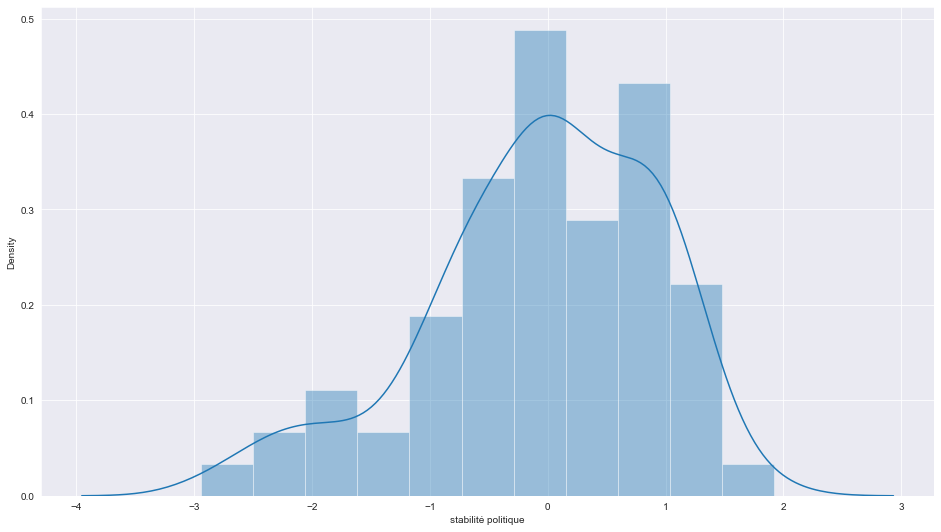

In [1811]:
plt.figure(figsize=(16,9))

sns.distplot(stabilité2['stabilité politique'])

plt.show()

### Jointure

In [1812]:
df = stabilité2.merge(macro2, on='zone', how='left')
df

,pop sous alimenté,stabilité politique,pib,pib par habitant
zone,,,,
Afghanistan,8300000.0,-2.80,1.862303e+10,513.085978
Afrique du Sud,3100000.0,-0.28,3.490067e+11,6121.876572
Albanie,100000.0,0.38,1.301973e+10,4514.204908
Algérie,1100000.0,-0.92,1.700972e+11,4109.701336
Allemagne,0.0,0.59,3.682602e+12,44552.061000
...,...,...,...,...
États-Unis d'Amérique,0.0,0.34,1.954298e+13,60116.568493
Éthiopie,14900000.0,-1.68,7.679452e+10,721.753494
Îles Cook,0.0,0.00,3.456090e+08,19741.188968


In [1813]:
df = df.merge(dispo2, on='zone', how='left')
df

,pop sous alimenté,stabilité politique,pib,pib par habitant,Disponibilité,Exportation,Importation,Nourriture,Production
zone,,,,,,,,,
Afghanistan,8300000.0,-2.80,1.862303e+10,513.085978,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07
Afrique du Sud,3100000.0,-0.28,3.490067e+11,6121.876572,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09
Albanie,100000.0,0.38,1.301973e+10,4514.204908,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07
Algérie,1100000.0,-0.92,1.700972e+11,4109.701336,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08
Allemagne,0.0,0.59,3.682602e+12,44552.061000,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09
...,...,...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.0,0.34,1.954298e+13,60116.568493,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10
Éthiopie,14900000.0,-1.68,7.679452e+10,721.753494,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1.400000e+07
Îles Cook,0.0,0.00,3.456090e+08,19741.188968,NaN,NaN,NaN,NaN,NaN


In [1814]:
df = df.merge(population2, on='zone', how='left')
df

,zone,pop sous alimenté,stabilité politique,pib,pib par habitant,Disponibilité,Exportation,Importation,Nourriture,Production,population
0,Afghanistan,8300000.0,-2.80,1.862303e+10,513.085978,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07,36296113.0
1,Afrique du Sud,3100000.0,-0.28,3.490067e+11,6121.876572,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09,57009756.0
2,Albanie,100000.0,0.38,1.301973e+10,4514.204908,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07,2884169.0
3,Algérie,1100000.0,-0.92,1.700972e+11,4109.701336,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08,41389189.0
4,Allemagne,0.0,0.59,3.682602e+12,44552.061000,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09,82658409.0
...,...,...,...,...,...,...,...,...,...,...,...
199,États-Unis d'Amérique,0.0,0.34,1.954298e+13,60116.568493,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10,325084756.0
200,Éthiopie,14900000.0,-1.68,7.679452e+10,721.753494,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1.400000e+07,106399924.0
201,Îles Cook,0.0,0.00,3.456090e+08,19741.188968,NaN,NaN,NaN,NaN,NaN,17507.0
202,Îles Marshall,0.0,0.87,2.077498e+08,3578.315150,NaN,NaN,NaN,NaN,NaN,58058.0


In [1815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zone                 204 non-null    object 
 1   pop sous alimenté    204 non-null    float64
 2   stabilité politique  204 non-null    float64
 3   pib                  200 non-null    float64
 4   pib par habitant     200 non-null    float64
 5   Disponibilité        172 non-null    float64
 6   Exportation          172 non-null    float64
 7   Importation          172 non-null    float64
 8   Nourriture           172 non-null    float64
 9   Production           172 non-null    float64
 10  population           203 non-null    float64
dtypes: float64(10), object(1)
memory usage: 19.1+ KB


In [1816]:
df.describe()

,pop sous alimenté,stabilité politique,pib,pib par habitant,Disponibilité,Exportation,Importation,Nourriture,Production,population
count,2.040000e+02,204.000000,2.000000e+02,200.000000,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,2.030000e+02
mean,2.728922e+06,-0.059657,4.656600e+11,14575.205690,6.795988e+08,1.037500e+08,8.848837e+07,6.494070e+08,7.083256e+08,3.716157e+07
std,1.357309e+07,0.977684,1.926078e+12,20361.162908,2.175613e+09,4.580661e+08,1.858246e+08,2.125189e+09,2.474456e+09,1.415822e+08
min,0.000000e+00,-2.940000,4.391250e+07,106.988543,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+03
25%,0.000000e+00,-0.642500,7.661305e+09,1966.849935,2.875000e+07,0.000000e+00,3.000000e+06,2.750000e+07,1.100000e+07,1.439068e+06
50%,1.000000e+05,0.000000,2.878695e+10,5752.488365,9.800000e+07,0.000000e+00,1.600000e+07,9.450000e+07,6.600000e+07,7.698474e+06
75%,1.200000e+06,0.750000,2.068139e+11,17339.632113,3.607500e+08,1.200000e+07,7.975000e+07,3.537500e+08,3.687500e+08,2.550017e+07
max,1.849000e+08,1.920000,1.954298e+13,113281.982125,1.826600e+10,4.223000e+09,1.069000e+09,1.810000e+10,2.191400e+10,1.421022e+09


In [1817]:
df.duplicated(subset=('zone')).sum()

0

In [1818]:
df.isnull().sum()

zone                    0
pop sous alimenté       0
stabilité politique     0
pib                     4
pib par habitant        4
Disponibilité          32
Exportation            32
Importation            32
Nourriture             32
Production             32
population              1
dtype: int64

In [1819]:
df = df.fillna(0)

In [1820]:
df = df.set_index(df.zone)


In [1821]:
df.drop('zone', axis=1, inplace=True)
df

,pop sous alimenté,stabilité politique,pib,pib par habitant,Disponibilité,Exportation,Importation,Nourriture,Production,population
zone,,,,,,,,,,
Afghanistan,8300000.0,-2.80,1.862303e+10,513.085978,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07,36296113.0
Afrique du Sud,3100000.0,-0.28,3.490067e+11,6121.876572,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09,57009756.0
Albanie,100000.0,0.38,1.301973e+10,4514.204908,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07,2884169.0
Algérie,1100000.0,-0.92,1.700972e+11,4109.701336,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08,41389189.0
Allemagne,0.0,0.59,3.682602e+12,44552.061000,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09,82658409.0
...,...,...,...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.0,0.34,1.954298e+13,60116.568493,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10,325084756.0
Éthiopie,14900000.0,-1.68,7.679452e+10,721.753494,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1.400000e+07,106399924.0
Îles Cook,0.0,0.00,3.456090e+08,19741.188968,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,17507.0


In [1822]:
population_sous_alimenté = round((df['pop sous alimenté']/df['population'])*100,2)
df['population sous alimenté'] = population_sous_alimenté
df

,pop sous alimenté,stabilité politique,pib,pib par habitant,Disponibilité,Exportation,Importation,Nourriture,Production,population,population sous alimenté
zone,,,,,,,,,,,
Afghanistan,8300000.0,-2.80,1.862303e+10,513.085978,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2.800000e+07,36296113.0,22.87
Afrique du Sud,3100000.0,-0.28,3.490067e+11,6121.876572,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,1.667000e+09,57009756.0,5.44
Albanie,100000.0,0.38,1.301973e+10,4514.204908,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,1.300000e+07,2884169.0,3.47
Algérie,1100000.0,-0.92,1.700972e+11,4109.701336,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,2.750000e+08,41389189.0,2.66
Allemagne,0.0,0.59,3.682602e+12,44552.061000,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.0,0.34,1.954298e+13,60116.568493,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,2.191400e+10,325084756.0,0.00
Éthiopie,14900000.0,-1.68,7.679452e+10,721.753494,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1.400000e+07,106399924.0,14.00
Îles Cook,0.0,0.00,3.456090e+08,19741.188968,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,17507.0,0.00


In [1823]:
df.drop(['pop sous alimenté', 'pib', 'Disponibilité', 'Nourriture'], axis=1, inplace=True)
df

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.80,513.085978,0.000000e+00,29000000.0,2.800000e+07,36296113.0,22.87
Afrique du Sud,-0.28,6121.876572,6.300000e+07,514000000.0,1.667000e+09,57009756.0,5.44
Albanie,0.38,4514.204908,0.000000e+00,38000000.0,1.300000e+07,2884169.0,3.47
Algérie,-0.92,4109.701336,0.000000e+00,2000000.0,2.750000e+08,41389189.0,2.66
Allemagne,0.59,44552.061000,6.460000e+08,842000000.0,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,325084756.0,0.00
Éthiopie,-1.68,721.753494,0.000000e+00,1000000.0,1.400000e+07,106399924.0,14.00
Îles Cook,0.00,19741.188968,0.000000e+00,0.0,0.000000e+00,17507.0,0.00


In [1824]:
df.dtypes

stabilité politique         float64
pib par habitant            float64
Exportation                 float64
Importation                 float64
Production                  float64
population                  float64
population sous alimenté    float64
dtype: object

In [1825]:
df['stabilité politique'] = pd.to_numeric(df['stabilité politique'])

In [1826]:
df.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
count,204.000000,204.000000,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,203.000000
mean,-0.059657,14289.417343,8.747549e+07,7.460784e+07,5.972157e+08,3.697941e+07,10.040049
std,0.977684,20261.091207,4.221130e+08,1.735748e+08,2.285700e+09,1.412570e+08,17.473292
min,-2.940000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,-0.642500,1845.354512,0.000000e+00,0.000000e+00,1.000000e+06,1.367892e+06,0.000000
50%,0.000000,5659.045614,0.000000e+00,1.000000e+07,4.400000e+07,7.593448e+06,3.470000
75%,0.750000,16918.888007,7.250000e+06,5.850000e+07,2.155000e+08,2.546500e+07,12.515000
max,1.920000,113281.982125,4.223000e+09,1.069000e+09,2.191400e+10,1.421022e+09,139.940000


In [1827]:
df = df.fillna(0)
df

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.80,513.085978,0.000000e+00,29000000.0,2.800000e+07,36296113.0,22.87
Afrique du Sud,-0.28,6121.876572,6.300000e+07,514000000.0,1.667000e+09,57009756.0,5.44
Albanie,0.38,4514.204908,0.000000e+00,38000000.0,1.300000e+07,2884169.0,3.47
Algérie,-0.92,4109.701336,0.000000e+00,2000000.0,2.750000e+08,41389189.0,2.66
Allemagne,0.59,44552.061000,6.460000e+08,842000000.0,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,325084756.0,0.00
Éthiopie,-1.68,721.753494,0.000000e+00,1000000.0,1.400000e+07,106399924.0,14.00
Îles Cook,0.00,19741.188968,0.000000e+00,0.0,0.000000e+00,17507.0,0.00


In [1828]:
df[(np.abs(stats.zscore(df['population sous alimenté'])>3))]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Dominique,1.20,7274.669503,0.0,4000000.0,0.0,71458.0,139.94
Kiribati,0.88,1640.552063,0.0,1000000.0,1000000.0,114158.0,87.60
Saint-Vincent-et-les Grenadines,0.89,7212.960181,0.0,9000000.0,0.0,109827.0,91.05


In [1829]:
df = df[(np.abs(stats.zscore(df['population sous alimenté'])<3))]
df

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.80,513.085978,0.000000e+00,29000000.0,2.800000e+07,36296113.0,22.87
Afrique du Sud,-0.28,6121.876572,6.300000e+07,514000000.0,1.667000e+09,57009756.0,5.44
Albanie,0.38,4514.204908,0.000000e+00,38000000.0,1.300000e+07,2884169.0,3.47
Algérie,-0.92,4109.701336,0.000000e+00,2000000.0,2.750000e+08,41389189.0,2.66
Allemagne,0.59,44552.061000,6.460000e+08,842000000.0,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,325084756.0,0.00
Éthiopie,-1.68,721.753494,0.000000e+00,1000000.0,1.400000e+07,106399924.0,14.00
Îles Cook,0.00,19741.188968,0.000000e+00,0.0,0.000000e+00,17507.0,0.00


In [1830]:
df.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
count,201.000000,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,201.000000
mean,-0.075323,14422.452519,8.878109e+07,7.565174e+07,6.061244e+08,3.752987e+07,8.554925
std,0.976268,20380.267998,4.251301e+08,1.746582e+08,2.301601e+09,1.422398e+08,12.625202
min,-2.940000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,-0.650000,1851.074677,0.000000e+00,0.000000e+00,2.000000e+06,1.828145e+06,0.000000
50%,0.000000,5637.509583,0.000000e+00,1.100000e+07,4.600000e+07,8.243848e+06,3.400000
75%,0.690000,17322.172592,8.000000e+06,6.000000e+07,2.230000e+08,2.557051e+07,12.120000
max,1.920000,113281.982125,4.223000e+09,1.069000e+09,2.191400e+10,1.421022e+09,58.950000


### Distribution of data

#### Vérification de la distriution des variables avant traitement:

In [1831]:
def distribution(item):

    for i in item.iloc[:,:]:
        plt.figure(figsize=(16,9))
        sns.distplot(item[i])
        plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


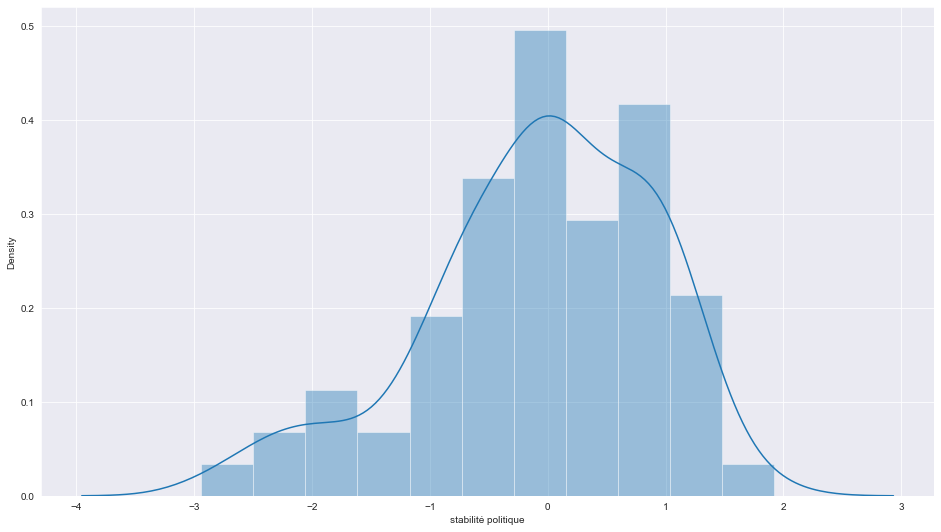

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


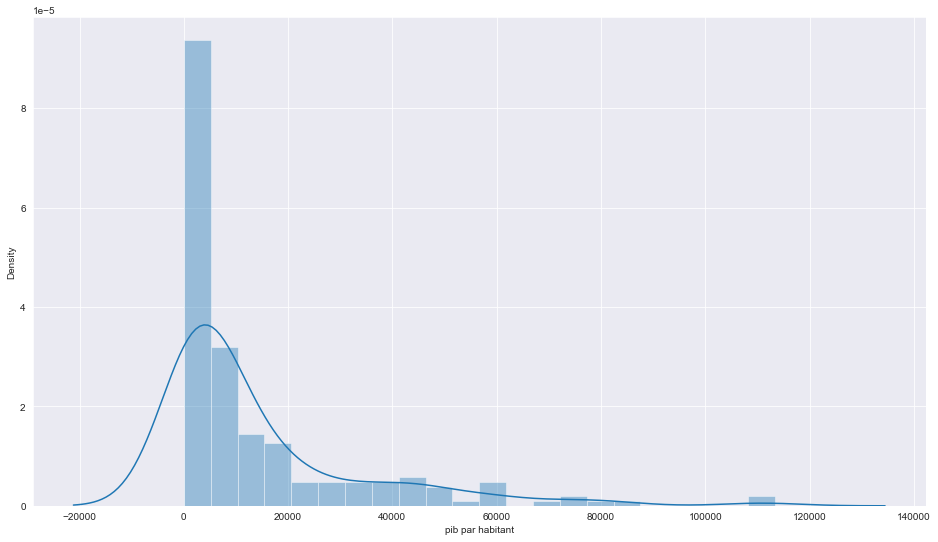

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


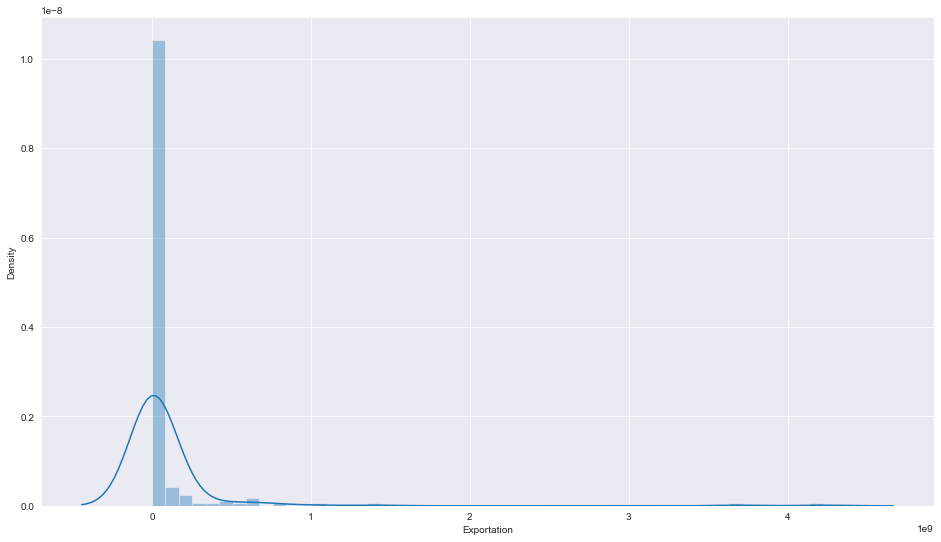

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


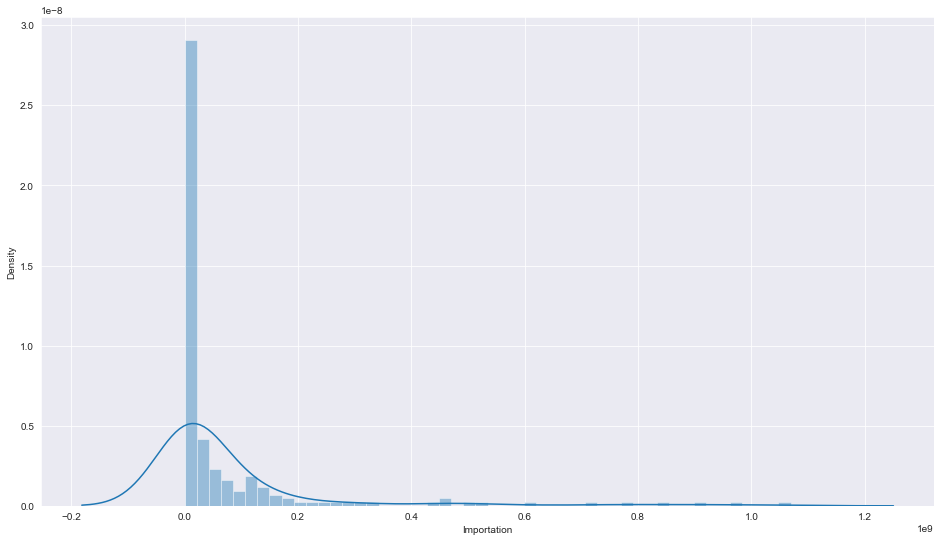

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


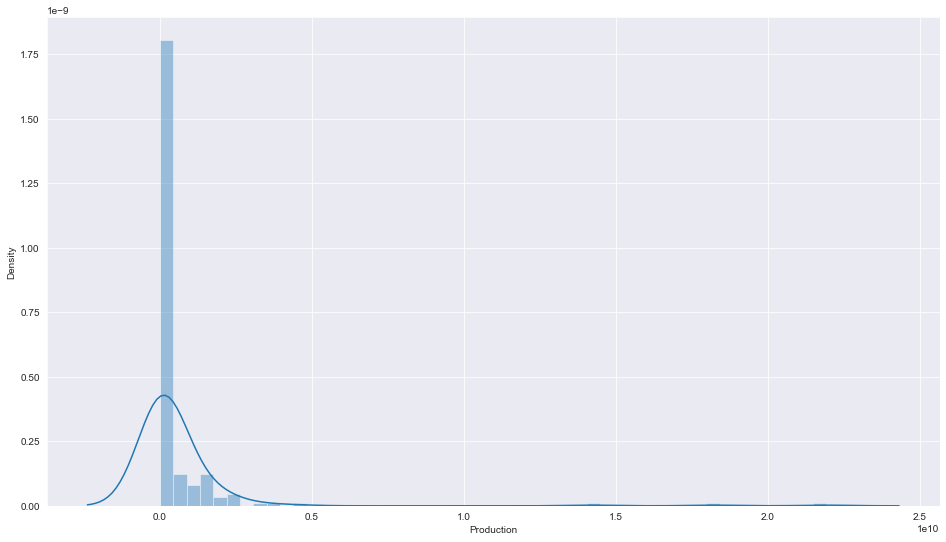

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


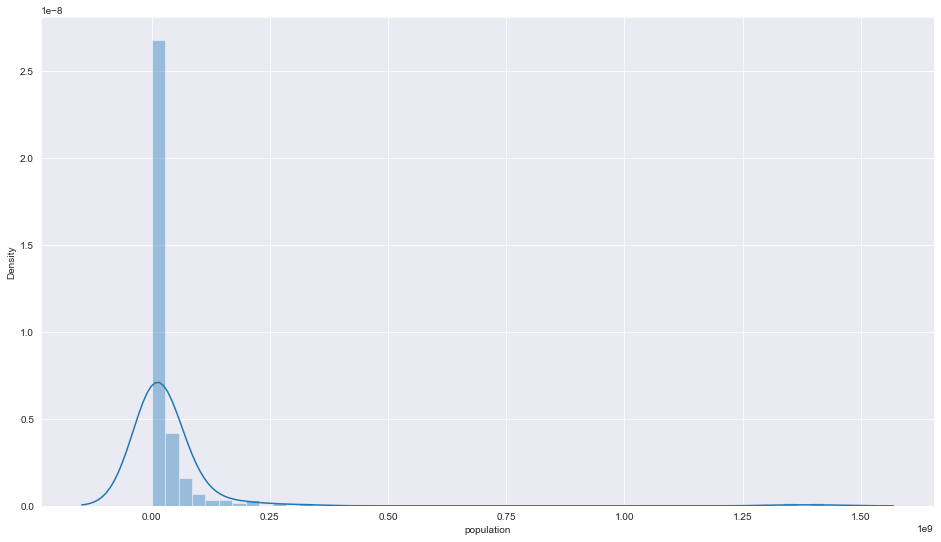

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


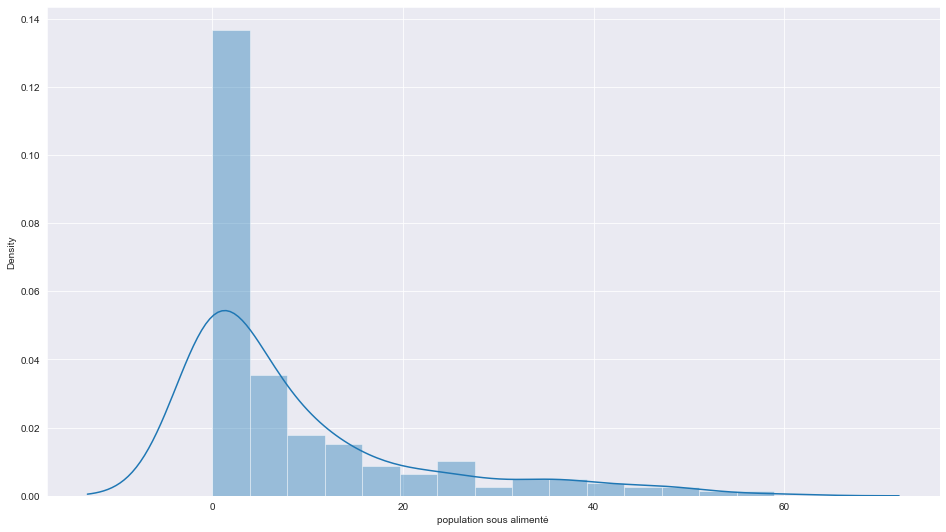

In [1832]:
distribution(df)

#### <font color='green'>On peut remarquer que les distributions des données sont dans la plupart des cas étendu sur la droite. Probablement dû à des valeurs extrêmes. Ceci est a prendre en compte concernant le futur traitement des données.</font>

### Normality test

#### Vérification à l'aide de deux tests statistiques (D’Agostino and Pearson’s , Shapiro-Wilk) pour déterminer si la distribution est gaussienne. 

##### Test D’Agostino and Pearson’s:

In [1833]:
#NormalTest:

alpha = 0.05

for i in df.iloc[:,:]:
    stat, pvalue = stats.normaltest(df[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

0.0008294156432316099
The data is not gaussian
3.854038228053561e-24
The data is not gaussian
1.6119693088722102e-71
The data is not gaussian
2.1251635265635237e-39
The data is not gaussian
7.593029148787023e-68
The data is not gaussian
1.2888920607944805e-74
The data is not gaussian
3.5920669610022035e-17
The data is not gaussian


##### Test Shapiro-Wilk:

In [1834]:
#ShapiroTest:

alpha = 0.05

for i in df.iloc[:,:]:
    stat, pvalue = stats.shapiro(df[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

3.1764957384439185e-05
The data is not gaussian
8.177634197730529e-19
The data is not gaussian
1.962466761362206e-28
The data is not gaussian
5.122338520433731e-24
The data is not gaussian
8.87526777754456e-28
The data is not gaussian
3.429528729800871e-28
The data is not gaussian
4.177083008790172e-18
The data is not gaussian


#### <font color='green'>D'après les deux tests effectués, les données ne suivent pas une distribution gaussienne. On pouvait d'ailleur déjà sans douter grace aux histogrammes.</font>

### New Dataframe

#### Création d'un nouveau dataframe dans lequel les données extrêmes ont été supprimé. Cela permettra d'effectuer les futurs traitements sans biais dû aux données extrêmes.

In [1835]:
US = df.loc["États-Unis d'Amérique"]
Brésil = df.loc['Brésil']

In [1836]:
df = df.drop(index=["États-Unis d'Amérique",'Brésil'], axis=0)
df

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.80,513.085978,0.0,29000000.0,2.800000e+07,36296113.0,22.87
Afrique du Sud,-0.28,6121.876572,63000000.0,514000000.0,1.667000e+09,57009756.0,5.44
Albanie,0.38,4514.204908,0.0,38000000.0,1.300000e+07,2884169.0,3.47
Algérie,-0.92,4109.701336,0.0,2000000.0,2.750000e+08,41389189.0,2.66
Allemagne,0.59,44552.061000,646000000.0,842000000.0,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...
Érythrée,-0.73,557.874751,0.0,0.0,0.000000e+00,3412893.0,0.00
Éthiopie,-1.68,721.753494,0.0,1000000.0,1.400000e+07,106399924.0,14.00
Îles Cook,0.00,19741.188968,0.0,0.0,0.000000e+00,17507.0,0.00


In [1837]:
cluster7 = df[(np.abs(stats.zscore(df['population'])>3))]
cluster7

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
"Chine, continentale",0.00,8663.125742,576000000.0,452000000.0,1.823600e+10,1.421022e+09,0.00
Inde,-0.76,1961.338029,4000000.0,0.0,3.545000e+09,1.338677e+09,13.81


In [1838]:
cluster7 = cluster7.append(US)
cluster7

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
"Chine, continentale",0.00,8663.125742,5.760000e+08,452000000.0,1.823600e+10,1.421022e+09,0.00
Inde,-0.76,1961.338029,4.000000e+06,0.0,3.545000e+09,1.338677e+09,13.81
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,3.250848e+08,0.00


In [1839]:
cluster7 = cluster7.append(Brésil)
cluster7

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
"Chine, continentale",0.00,8663.125742,5.760000e+08,452000000.0,1.823600e+10,1.421022e+09,0.00
Inde,-0.76,1961.338029,4.000000e+06,0.0,3.545000e+09,1.338677e+09,13.81
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,3.250848e+08,0.00
Brésil,-0.42,9925.419442,4.223000e+09,3000000.0,1.420100e+10,2.078338e+08,0.00


In [1840]:
data = df[(np.abs(stats.zscore(df['population'])<3))]
data

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.80,513.085978,0.0,29000000.0,2.800000e+07,36296113.0,22.87
Afrique du Sud,-0.28,6121.876572,63000000.0,514000000.0,1.667000e+09,57009756.0,5.44
Albanie,0.38,4514.204908,0.0,38000000.0,1.300000e+07,2884169.0,3.47
Algérie,-0.92,4109.701336,0.0,2000000.0,2.750000e+08,41389189.0,2.66
Allemagne,0.59,44552.061000,646000000.0,842000000.0,1.514000e+09,82658409.0,0.00
...,...,...,...,...,...,...,...
Érythrée,-0.73,557.874751,0.0,0.0,0.000000e+00,3412893.0,0.00
Éthiopie,-1.68,721.753494,0.0,1000000.0,1.400000e+07,106399924.0,14.00
Îles Cook,0.00,19741.188968,0.0,0.0,0.000000e+00,17507.0,0.00


In [1841]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   stabilité politique       197 non-null    float64
 1   pib par habitant          197 non-null    float64
 2   Exportation               197 non-null    float64
 3   Importation               197 non-null    float64
 4   Production                197 non-null    float64
 5   population                197 non-null    float64
 6   population sous alimenté  197 non-null    float64
dtypes: float64(7)
memory usage: 12.3+ KB


In [1842]:
data.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
count,197.000000,197.000000,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197.000000
mean,-0.072589,14305.819820,4.746193e+07,7.425381e+07,3.245431e+08,2.157810e+07,8.658528
std,0.984193,20300.266428,1.673818e+08,1.741720e+08,6.606980e+08,3.763253e+07,12.703417
min,-2.940000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,-0.650000,1828.194018,0.000000e+00,0.000000e+00,1.000000e+06,1.494076e+06,0.000000
50%,0.000000,5430.875559,0.000000e+00,1.100000e+07,4.300000e+07,7.488423e+06,3.470000
75%,0.700000,17322.172592,7.000000e+06,5.800000e+07,2.010000e+08,2.456607e+07,12.120000
max,1.920000,113281.982125,1.418000e+09,1.069000e+09,4.444000e+09,2.646510e+08,58.950000


### Normality Test 2:

#### Nouveau test de normalité effectué, pour vérifier si les données ce rapproche un peu plus d'une distribution gaussienne.

##### Test D’Agostino and Pearson’s

In [1843]:
#NormalTest:

alpha = 0.05

for i in data.iloc[:,:]:
    stat, pvalue = stats.normaltest(data[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

0.000925716410659182
The data is not gaussian
3.1722070958784255e-24
The data is not gaussian
2.772785401258724e-53
The data is not gaussian
1.6965176075289308e-39
The data is not gaussian
6.640048617504226e-32
The data is not gaussian
2.5714923805246512e-37
The data is not gaussian
1.2611898143782838e-16
The data is not gaussian


##### Test Shapiro-Wilk

In [1844]:
#ShapiroTest:

alpha = 0.05

for i in data.iloc[:,:]:
    stat, pvalue = stats.shapiro(data[i])
    print(pvalue)
    if pvalue > alpha:
        print('The data is gaussian')
    else:
        print('The data is not gaussian')

2.9133076168363914e-05
The data is not gaussian
1.0965751400880726e-18
The data is not gaussian
1.3880414383767957e-26
The data is not gaussian
5.661001539941679e-24
The data is not gaussian
3.2228539940457173e-22
The data is not gaussian
1.738368928790988e-21
The data is not gaussian
7.599643295672749e-18
The data is not gaussian


#### <font color='green'>Malgré les valeurs extrêmes traités, comme on pouvait sans douter la distribution des données ne suit toujours pas une loi Normale.</font>

### Standardization

#### Standardization des données pour que ces dernières soient sur le même ordre de grandeur. Cela permettra d'optimiser les futurs traitements et analyses:

In [1845]:
scaler2 = StandardScaler()
X = scaler2.fit_transform(data)
X

array([[-2.77827657, -0.68116715, -0.28427732, ..., -0.44997667,
         0.39209453,  1.12156278],
       [-0.21127932, -0.40417174,  0.09306662, ...,  2.03705352,
         0.94391544, -0.25400473],
       [ 0.46102948, -0.48356812, -0.28427732, ..., -0.47273777,
        -0.49801493, -0.40947622],
       ...,
       [ 0.07394259,  0.26843082, -0.28427732, ..., -0.49246407,
        -0.57438412, -0.68332701],
       [ 0.96016783, -0.52978792, -0.28427732, ..., -0.49246407,
        -0.57330382, -0.68332701],
       [ 0.27767253, -0.61210854, -0.28427732, ..., -0.49246407,
        -0.55790614,  0.5572881 ]])

In [1846]:
X = pd.DataFrame(X)
X.columns = data.columns
X = X.set_index(data.index)
X

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
Afghanistan,-2.778277,-0.681167,-0.284277,-0.260484,-0.449977,0.392095,1.121563
Afrique du Sud,-0.211279,-0.404172,0.093067,2.531214,2.037054,0.943915,-0.254005
Albanie,0.461029,-0.483568,-0.284277,-0.208680,-0.472738,-0.498015,-0.409476
Algérie,-0.863215,-0.503545,-0.284277,-0.415899,-0.075177,0.527776,-0.473401
Allemagne,0.674946,1.493739,3.584995,4.419208,1.804890,1.627207,-0.683327
...,...,...,...,...,...,...,...
Érythrée,-0.669672,-0.678955,-0.284277,-0.427411,-0.492464,-0.483929,-0.683327
Éthiopie,-1.637389,-0.670862,-0.284277,-0.421655,-0.471220,2.259692,0.421546
Îles Cook,0.073943,0.268431,-0.284277,-0.427411,-0.492464,-0.574384,-0.683327


In [1847]:
X.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-1.155308e-17,4.903015e-17,-8.453475e-18,8.453475e-18,5.128441e-17,-1.972477e-17,1.053867e-16
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.920888e+00,-7.065064e-01,-2.842773e-01,-4.274108e-01,-4.924641e-01,-5.748505e-01,-6.833270e-01
25%,-5.881797e-01,-6.162193e-01,-2.842773e-01,-4.274108e-01,-4.909467e-01,-5.350476e-01,-6.833270e-01
50%,7.394259e-02,-4.382975e-01,-2.842773e-01,-3.640939e-01,-4.272156e-01,-3.753555e-01,-4.094762e-01
75%,7.869974e-01,1.489654e-01,-2.423502e-01,-9.355820e-02,-1.874652e-01,7.960090e-02,2.731778e-01
max,2.029750e+00,4.888031e+00,8.208956e+00,5.725838e+00,6.250893e+00,6.475572e+00,3.968980e+00


#### Visualisation des distributions de chaques variables, une fois les données standardizés:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


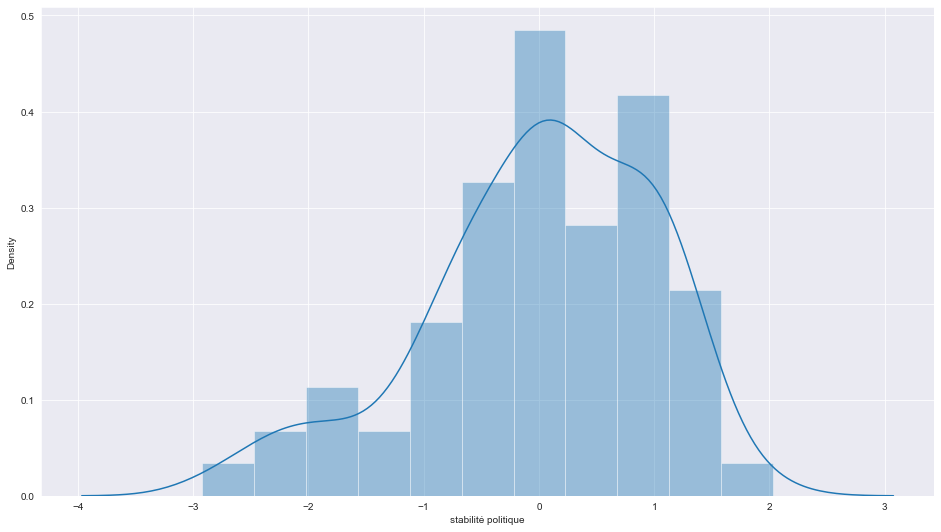

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


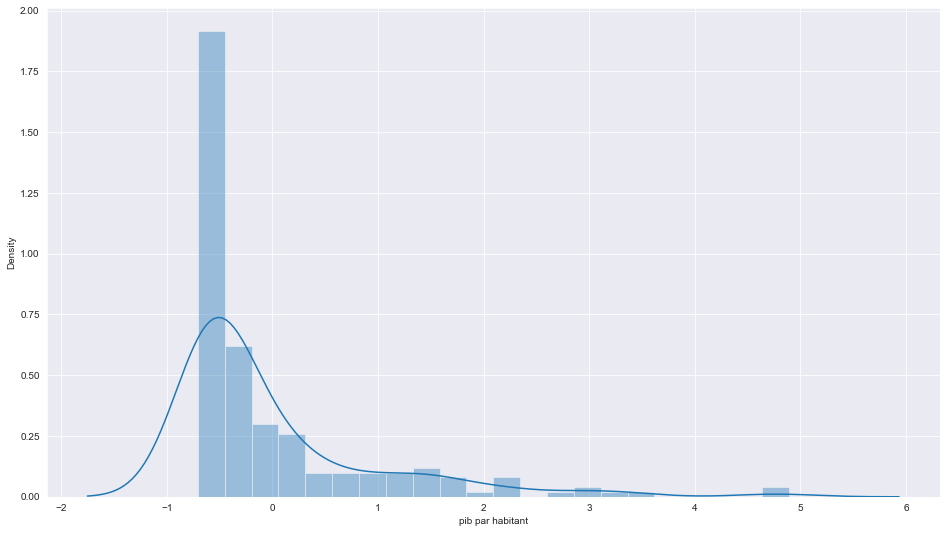

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


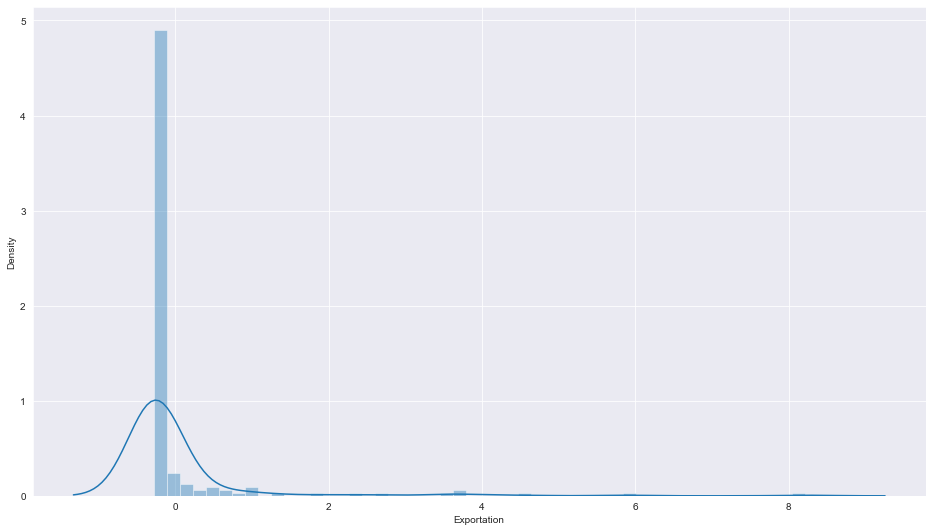

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


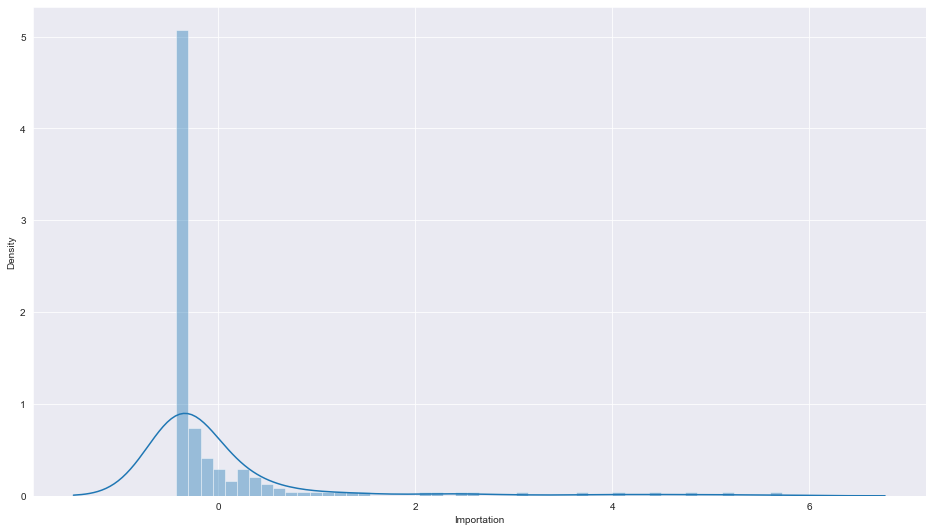

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


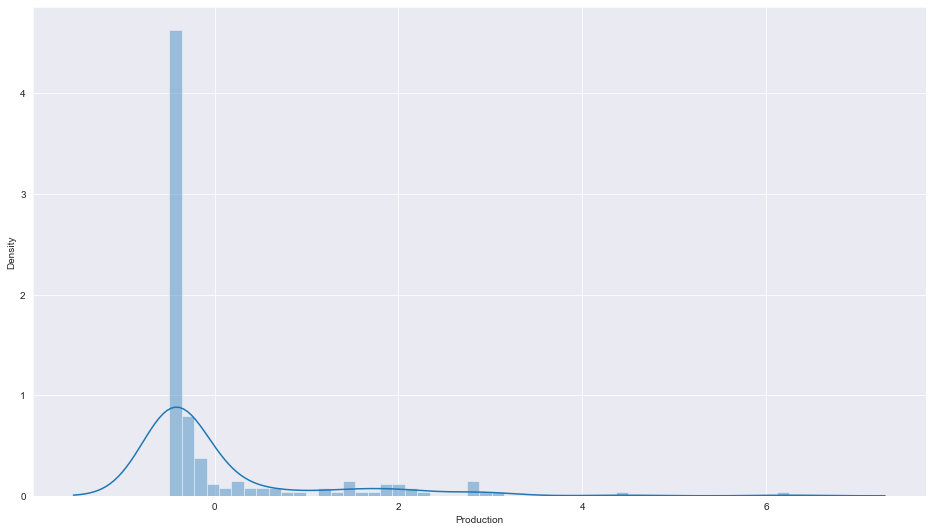

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


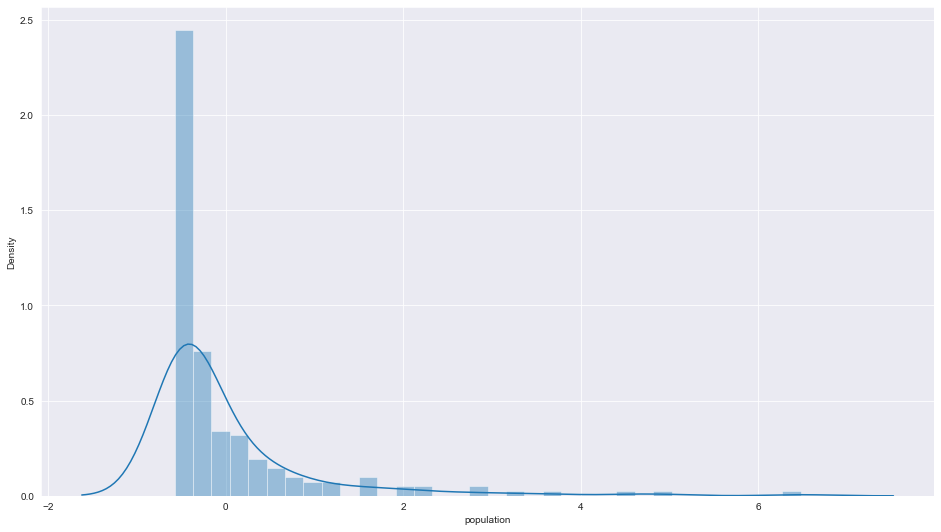

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


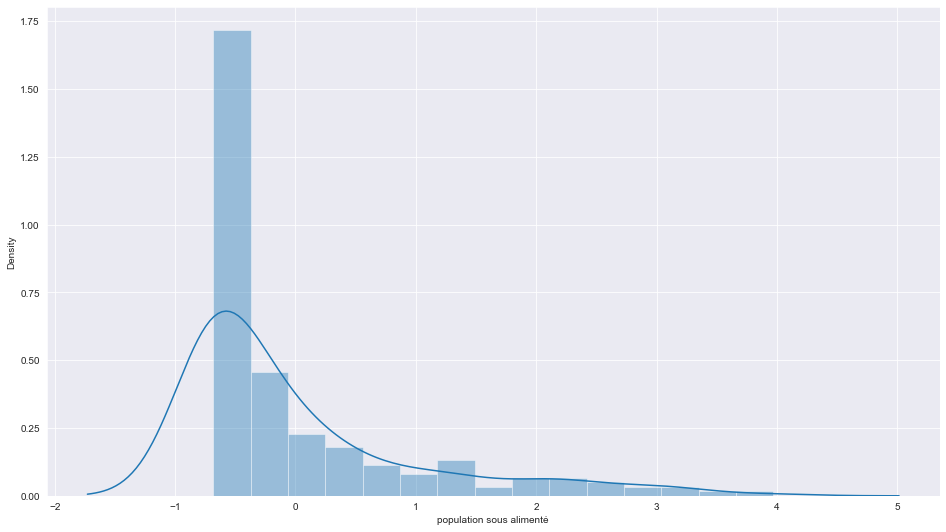

In [1848]:
distribution(X)

#### <font color='green'>On peut observer que le traitement appliqué aux données a permis de rendre celles-ci plus exploitables. En effet, on peut observer que les distributions sont moins étendu sur la droite qu'auparavant.</font>

### Analyse en composante principal (ACP):

#### Travail sur la réduction des dimensions non nécessaire aux analyses futures à l'aide de L' ANALAYSE EN COMPOSANTE PRINCIPAL. Cela permettra de réduire le nombre de variable à observer tout en gardant un maximum d'information.

##### Vérification du Ratio de Variance et des Valeurs propres:

In [1849]:
#ACP:
pca = PCA()
pca.fit_transform(X)
print('Ratio de Variance:', pca.explained_variance_ratio_)
print('Valeurs par Axes:', pca.singular_values_)

Ratio de Variance: [0.33201842 0.27883211 0.12141488 0.09545338 0.07438851 0.06295411
 0.03493859]
Valeurs par Axes: [21.39750916 19.60891343 12.93951774 11.47302098 10.12826521  9.3173876
  6.94120439]


##### Dataframe représentant la variance expliquée par dimensions:

In [1850]:
eigen = pd.DataFrame(
    {
        'dimension': [ 'PC' + str(x+1) for x in range(7)],
        'variancre expliquée': pca.explained_variance_,
        '% variance expliquée': np.round(pca.explained_variance_ratio_ *100),
        '% cum. var. expliquée': np.round(np.cumsum(pca.explained_variance_ratio_ )* 100),
    }
)
eigen

,dimension,variancre expliquée,% variance expliquée,% cum. var. expliquée
0,PC1,2.335987,33.0,33.0
1,PC2,1.961783,28.0,61.0
2,PC3,0.854240,12.0,73.0
3,PC4,0.671583,10.0,83.0
4,PC5,0.523376,7.0,90.0
5,PC6,0.442927,6.0,97.0
6,PC7,0.245818,3.0,100.0


#### <font color='green'>On observe grâce à l'ACP que les 4-5 premières dimensions représentent 83%-90% de l'information. Reste maintenant à choisir si l'on garde les 4 premières ou les 5 premières dimensions.</font>

##### Visualisation du poids de la variance par dimensions:

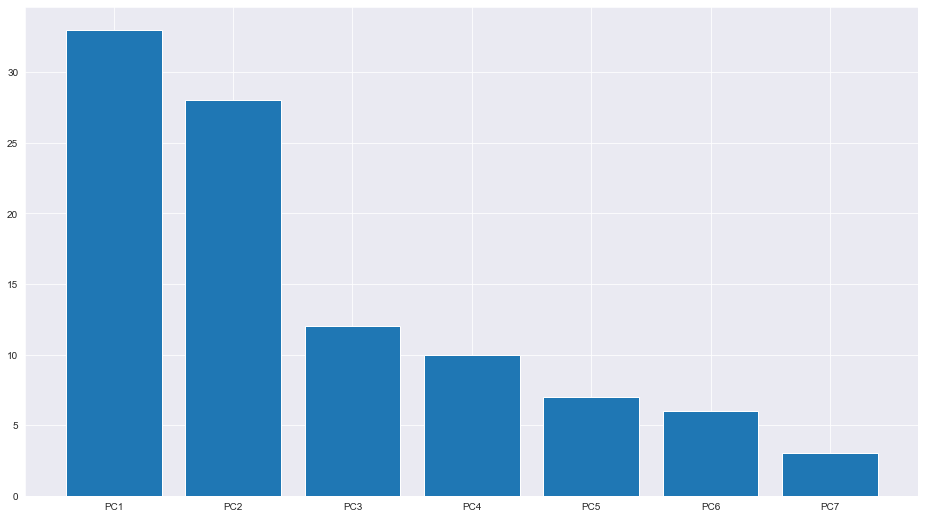

In [1851]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,9))
plt.bar(eigen['dimension'], eigen['% variance expliquée'] )
plt.show()

##### Heatmap permettant de mettre en avant les liens entre les différentes dimensions:

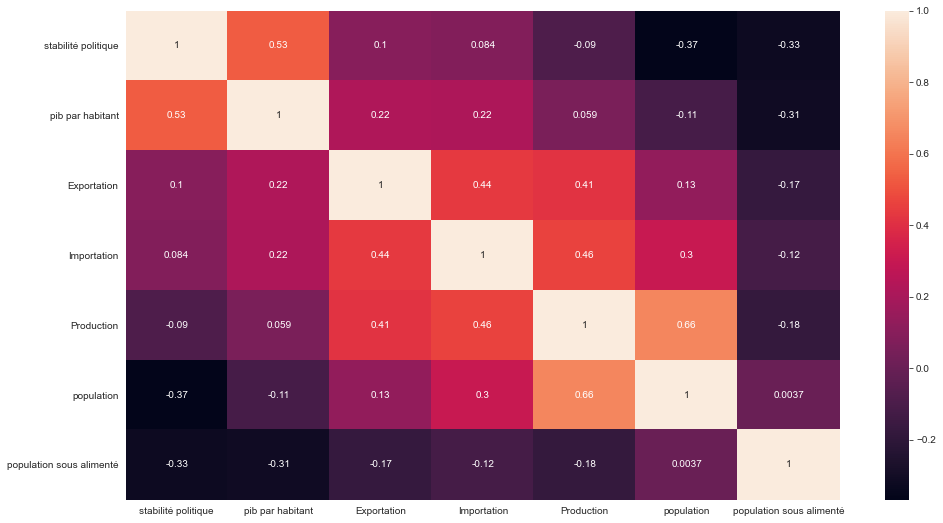

In [1852]:
plt.figure(figsize=(16, 9))

sns.heatmap(X.corr(), annot=True)

plt.show()

#### <font color='green'>Grâce à la heatmap on peut voir de manière explicite les corrélations existantes entre les différentes dimensions. On voit très clairement que la production et la population sont fortement corrélées. En effet, cela a du sens, on comprend tout à fait les besoins alimentaires de la population et donc de productions à cette fin.</font>

##### Visualisation des cercles de corrélations

In [1853]:
pcs = pca.components_
features = data.columns
n_comp = 7

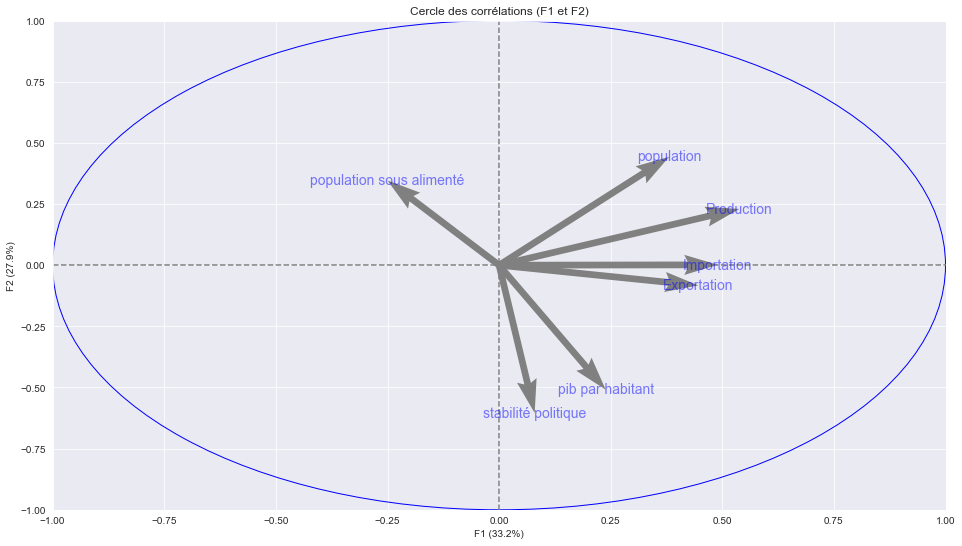

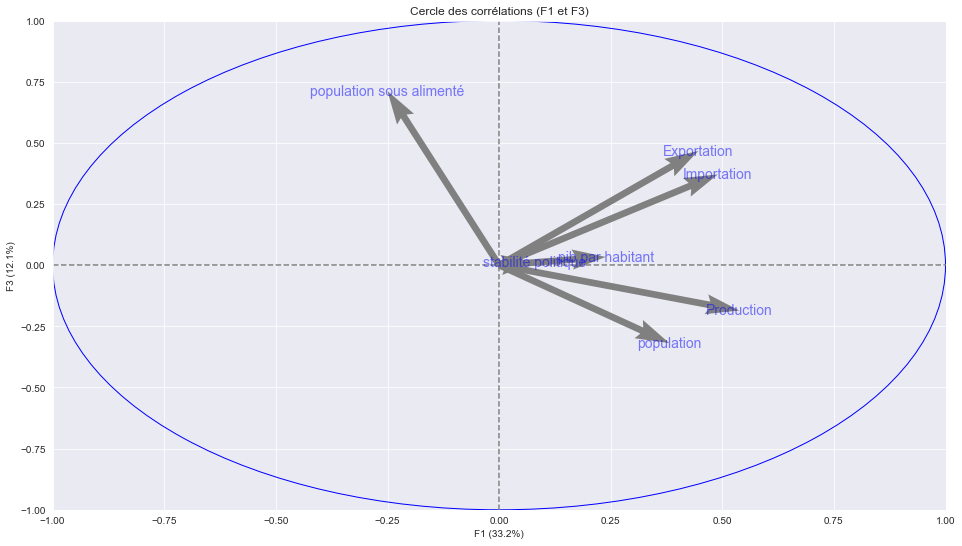

In [1898]:
display_circles(pcs, n_comp, pca, [(0,1),(0,2)], labels=np.array(features))

#### <font color='green'>Les différents cercles permettent de mettre en lumière plusieurs explications concernant les dimensions. La première composante représente les dimensions liées à l'alimentation. La deuxième représente les facteurs économiques des pays. Et la troisième représente la sous-nutrition observée.</font>

##### Choix du nombres de composantes gardés:

In [1855]:
pca2 = PCA(4)
Z = pca2.fit_transform(X)

##### Dataframe avec les 4 compossantes séléctionnés:

In [1856]:
Z2 = pd.DataFrame(Z, index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
Z2

,PC1,PC2,PC3,PC4
zone,,,,
Afghanistan,-1.011792,2.507176,0.468931,0.208703
Afrique du Sud,2.687625,1.127689,0.106918,-0.472303
Albanie,-0.649629,-0.480408,-0.265865,0.387957
Algérie,-0.240595,0.853256,-0.806479,0.374271
Allemagne,5.937907,-0.559078,2.032995,0.212133
...,...,...,...,...
Érythrée,-0.830250,0.208708,-0.564184,0.892450
Éthiopie,-0.122156,2.392396,-0.664877,-0.336452
Îles Cook,-0.579251,-0.762782,-0.493839,0.302044


In [1857]:
Z2.describe()

,PC1,PC2,PC3,PC4
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-6.762780e-18,-1.964167e-17,-7.889910e-18,-2.972805e-17
std,1.528394e+00,1.400637e+00,9.242513e-01,8.195015e-01
min,-2.009966e+00,-3.804038e+00,-3.059616e+00,-2.743608e+00
25%,-8.284620e-01,-8.915217e-01,-5.094685e-01,-4.783275e-01
50%,-5.532511e-01,-6.286985e-02,-2.671862e-01,9.202491e-02
75%,1.916732e-01,7.584702e-01,3.363709e-01,4.135974e-01
max,6.417111e+00,4.409850e+00,4.377679e+00,3.665512e+00


#### <font color='green'>L' ACP nous à permis de réduire le nombres de dimensions à 4 au lieu de 7 en ne perdant que 17% de l'information. Cela permettra par le suite un gain de temps concernant les futurs traitements algorithmiques et analyses sur les données.</font>

### Classification Ascendante Hierachique:

#### Utilisation de CAH pour effectuer un clustering des données pour optimiser les analyses futurs.

In [1858]:
Z3 = Z2.copy()
Z3

,PC1,PC2,PC3,PC4
zone,,,,
Afghanistan,-1.011792,2.507176,0.468931,0.208703
Afrique du Sud,2.687625,1.127689,0.106918,-0.472303
Albanie,-0.649629,-0.480408,-0.265865,0.387957
Algérie,-0.240595,0.853256,-0.806479,0.374271
Allemagne,5.937907,-0.559078,2.032995,0.212133
...,...,...,...,...
Érythrée,-0.830250,0.208708,-0.564184,0.892450
Éthiopie,-0.122156,2.392396,-0.664877,-0.336452
Îles Cook,-0.579251,-0.762782,-0.493839,0.302044


##### Dendrogramme

In [1859]:
link = linkage(Z3, 'ward') 

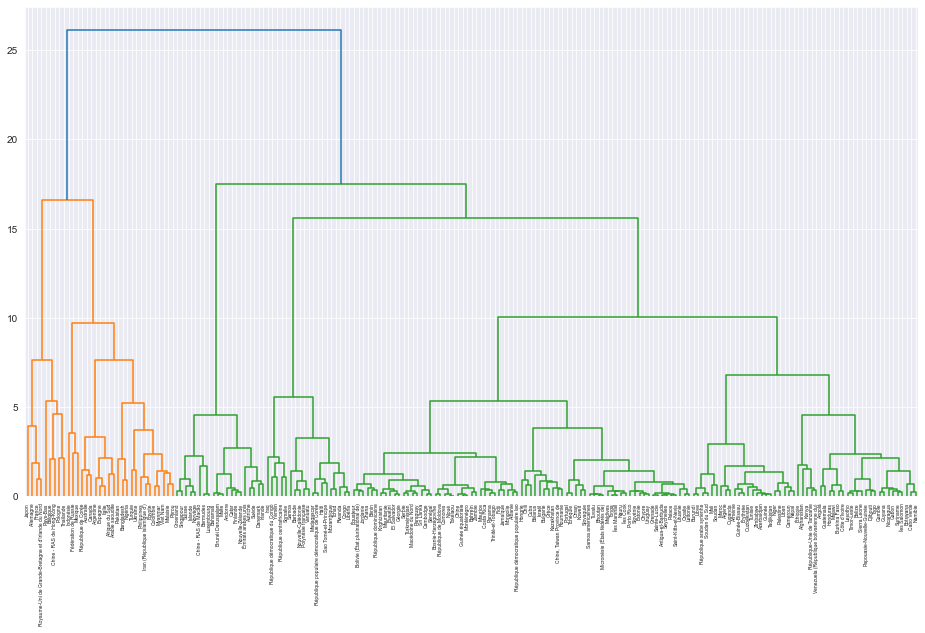

In [1860]:
plt.figure(figsize=(16,9))

dendrogram(link, labels=Z3.index)

plt.show()

##### <font color='green'>Le dendrogramme permet de visualiser le nombre de clusters adéquats pour réaliser le CAH.</font>

### CAH

In [1861]:
cah = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cah.fit_predict(Z3)
print(cah.labels_)

[3 0 2 3 1 5 3 2 0 0 3 0 5 3 5 2 0 4 1 3 5 2 2 2 3 5 2 3 3 2 2 3 2 3 0 2 2
 1 5 2 2 0 2 4 2 2 2 3 5 3 2 0 2 2 2 5 1 6 3 3 2 2 5 2 3 3 2 3 3 2 4 3 2 6
 0 4 5 5 2 0 2 1 2 2 3 2 2 3 2 3 3 4 2 5 2 4 0 3 2 3 5 3 2 2 6 2 2 2 4 0 3
 2 3 3 0 2 5 4 5 3 2 3 3 0 2 3 2 3 2 1 0 1 4 2 2 0 5 2 1 4 3 4 0 2 2 4 2 4
 3 2 2 4 2 4 2 2 3 5 2 2 4 3 3 2 5 3 5 2 3 4 2 1 3 3 2 2 2 3 2 0 2 0 2 4 3
 0 4 2 3 0 5 2 3 3 2 2 3]


In [1862]:
label = pd.DataFrame(cah.labels_, index=Z3.index, columns=['labels'])
label

,labels
zone,
Afghanistan,3
Afrique du Sud,0
Albanie,2
Algérie,3
Allemagne,1
...,...
Érythrée,3
Éthiopie,3
Îles Cook,2


#### Clustermap:

In [1863]:
my_palette = dict(zip(label.labels.unique(), sns.hls_palette(len(label.labels.unique()))))
row_colors = label.labels.map(my_palette)

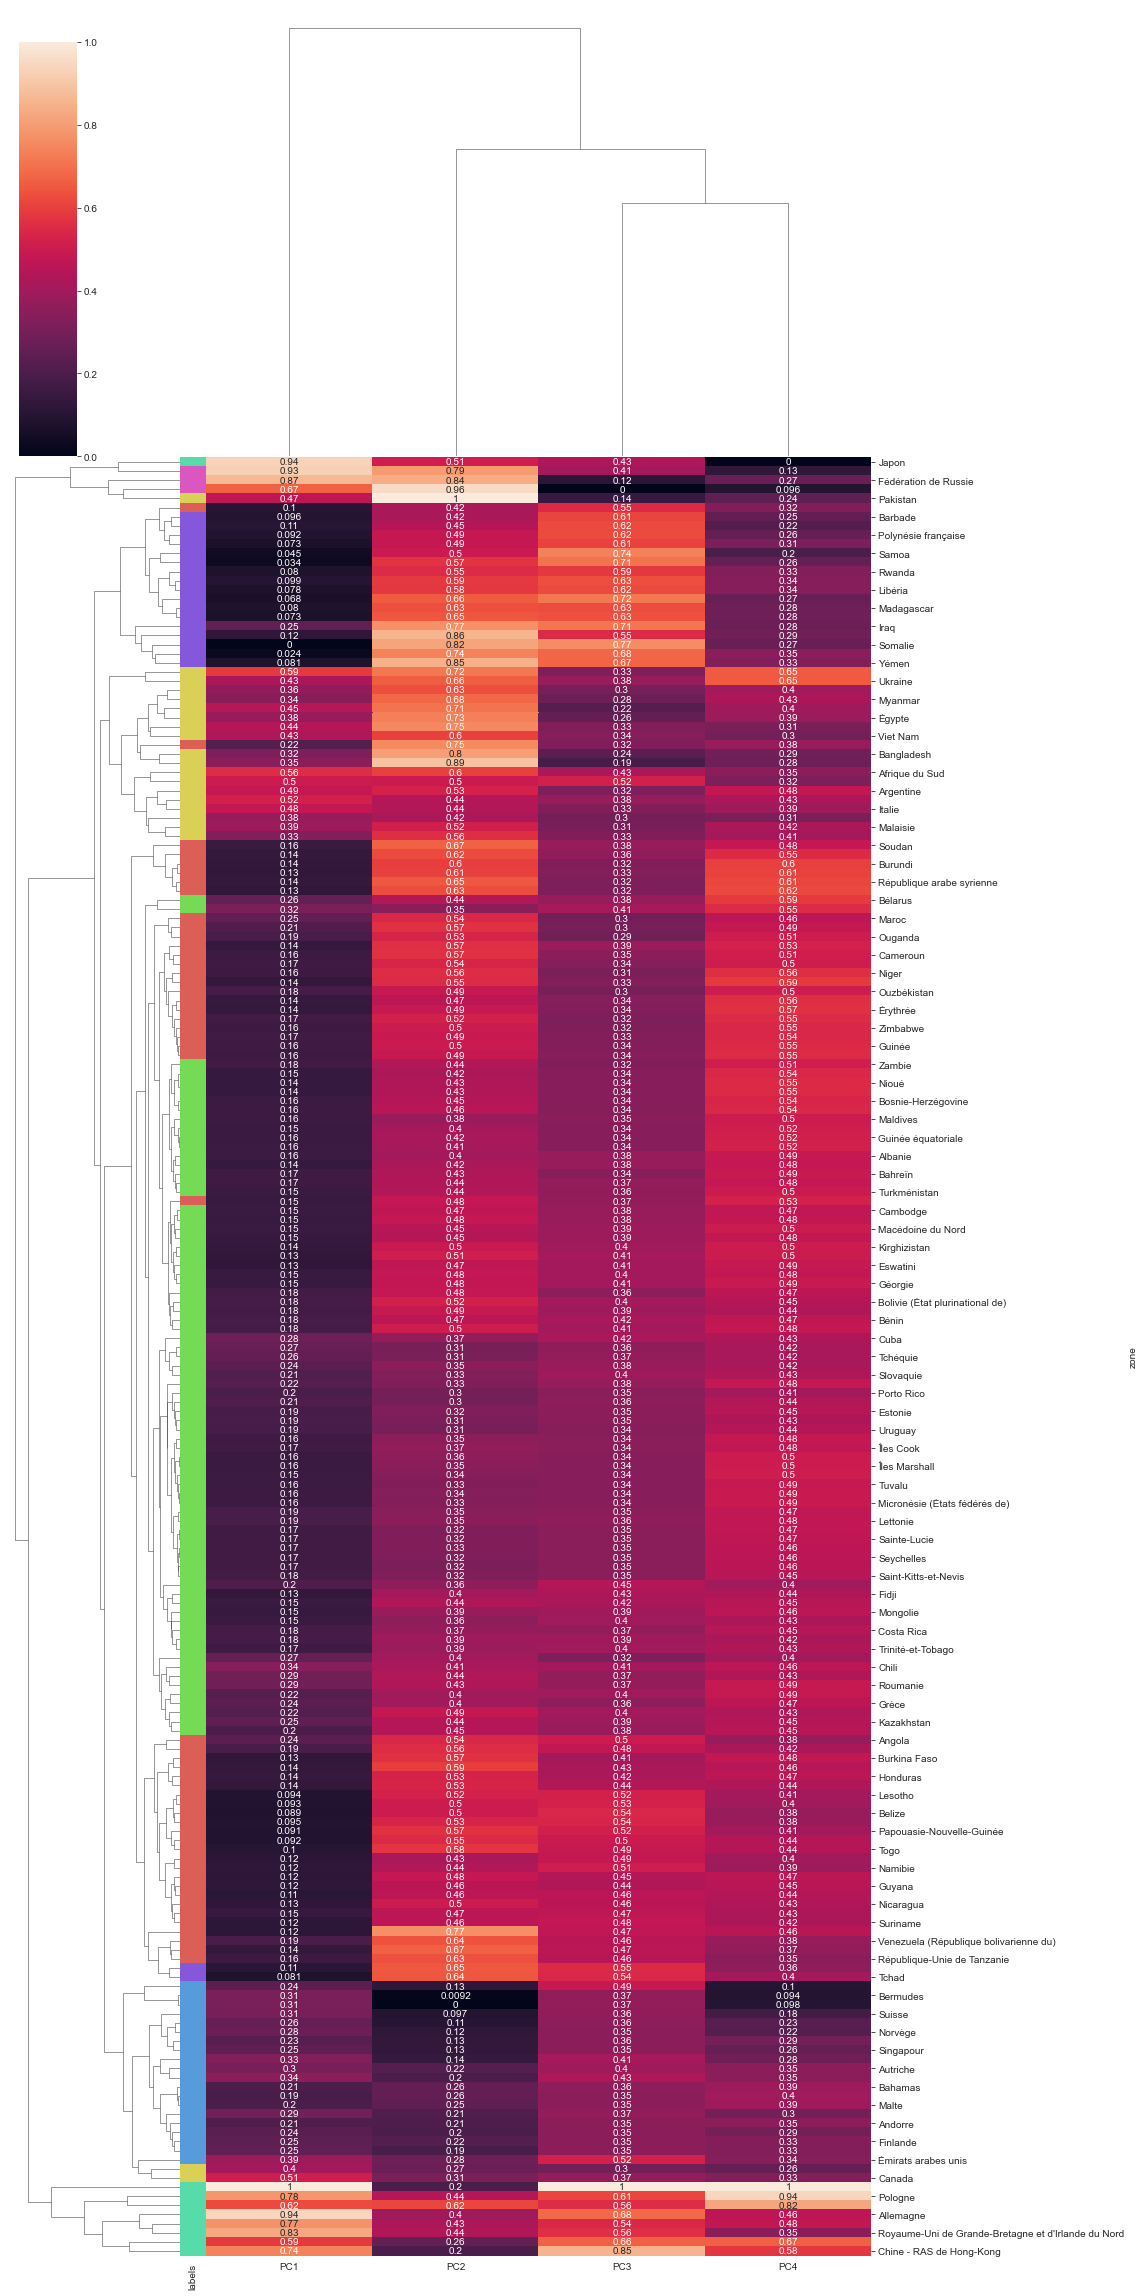

In [1864]:
sns.set_style('darkgrid')

sns.clustermap(Z3, annot=True, figsize=(16,32), standard_scale=1, row_colors=row_colors)

plt.show()

##### <font color='green'>La clustermap permet d'interpréter les clusters en fonctions des différentes composantes. Il permet une compréhension plus approfondi de la manière dont le clustering a été réalisé par l'alghorithme CAH.</font>

#### Visualisations des différents clusters réalisé avec l'algorithme du CAH:

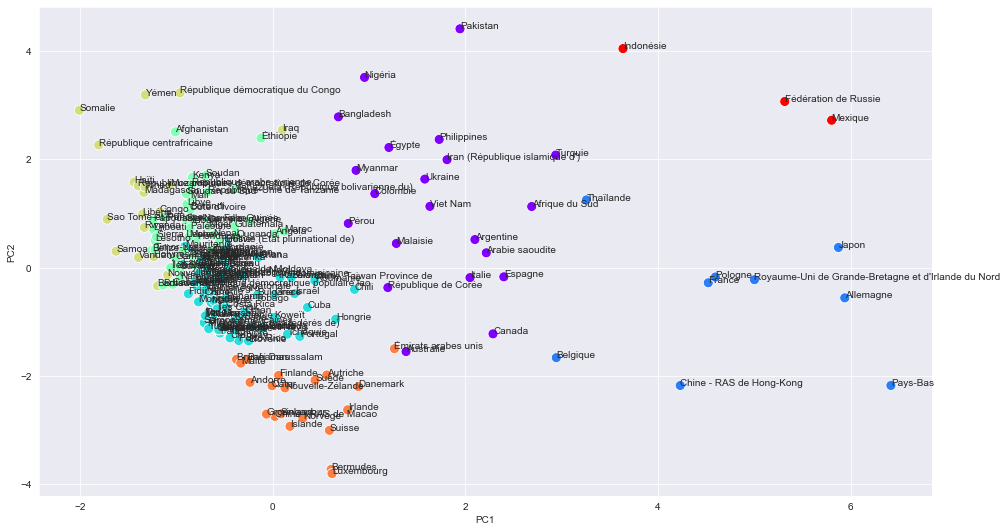

In [1865]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))

sns.scatterplot(data=Z3, x=Z3.iloc[:,0], y=Z3.iloc[:,1], hue=label.labels, s=100, palette='rainbow', legend=False)

for i in range(Z3.shape[0]):
    plt.text(Z3.iloc[:,0][i], Z3.iloc[:,1][i], s=Z3.index[i])

plt.show()

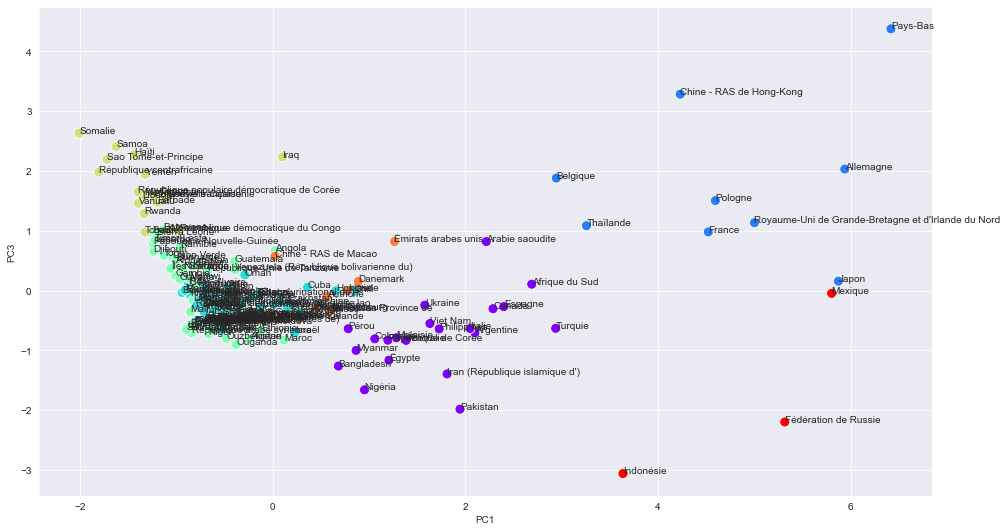

In [1866]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))

sns.scatterplot(data=Z3, x=Z3.iloc[:,0], y=Z3.iloc[:,2], hue=label.labels, s=100, palette='rainbow', legend=False)

for i in range(Z3.shape[0]):
    plt.text(Z3.iloc[:,0][i], Z3.iloc[:,2][i], s=Z3.index[i])

plt.show()

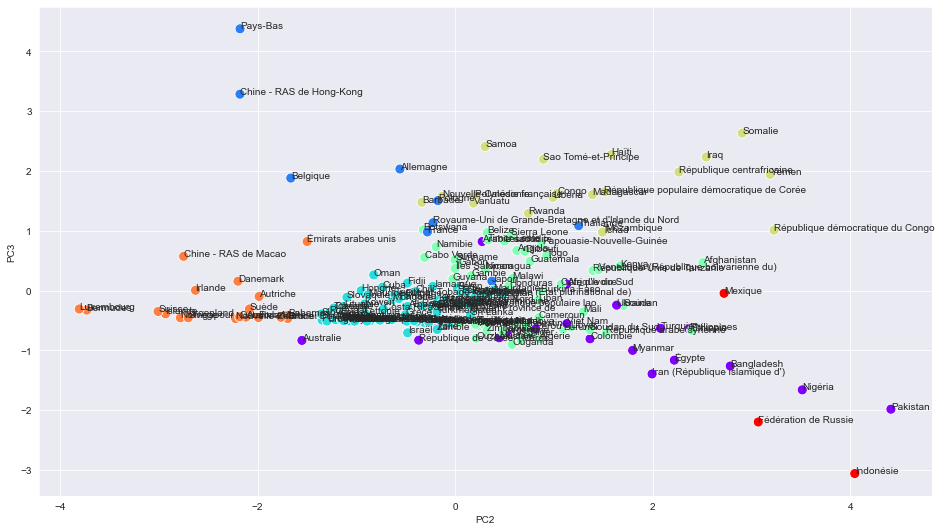

In [1867]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))

sns.scatterplot(data=Z3, x=Z3.iloc[:,1], y=Z3.iloc[:,2], hue=label.labels, s=100, palette='rainbow', legend=False)

for i in range(Z3.shape[0]):
    plt.text(Z3.iloc[:,1][i], Z3.iloc[:,2][i], s=Z3.index[i])

plt.show()

##### <font color='green'>Grâce à ces visualisations, on peut observer les clusters en fonction des différentes composantes. Cela permet également de mieux comprendre comment ont été réalisé ces différents clusters.</font>

##### Dataframe labellisé grace à l'algorithme CAH.

In [1868]:
Z3['labels'] = label
Z3

,PC1,PC2,PC3,PC4,labels
zone,,,,,
Afghanistan,-1.011792,2.507176,0.468931,0.208703,3
Afrique du Sud,2.687625,1.127689,0.106918,-0.472303,0
Albanie,-0.649629,-0.480408,-0.265865,0.387957,2
Algérie,-0.240595,0.853256,-0.806479,0.374271,3
Allemagne,5.937907,-0.559078,2.032995,0.212133,1
...,...,...,...,...,...
Érythrée,-0.830250,0.208708,-0.564184,0.892450,3
Éthiopie,-0.122156,2.392396,-0.664877,-0.336452,3
Îles Cook,-0.579251,-0.762782,-0.493839,0.302044,2


### K-means:

#### Determiner le nombre de cluster à l'aide de l'inertie intraclasse:

In [1869]:
Z4 = Z2.copy()

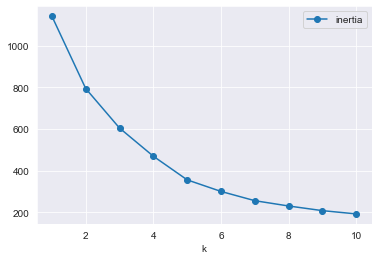

In [1870]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 50).fit(Z4)
    inertia = inertia + [kmeans.inertia_]

inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia", marker='o')

plt.show()

##### <font color='green'>Le nombre de clusters adéquats pour réaliser le KMeans est donc de 7 d'après le graphique ci-dessus.</font>

In [1871]:
cluster = KMeans(n_clusters=7)
cluster.fit_predict(Z4)

array([0, 4, 1, 6, 2, 3, 6, 1, 4, 4, 6, 3, 3, 6, 1, 6, 4, 0, 2, 0, 3, 1,
       6, 6, 0, 1, 1, 6, 6, 6, 6, 6, 6, 6, 3, 1, 1, 2, 3, 1, 1, 4, 6, 0,
       1, 1, 1, 6, 3, 0, 6, 4, 1, 6, 1, 3, 2, 5, 6, 6, 6, 1, 3, 1, 6, 6,
       6, 6, 6, 6, 0, 6, 1, 5, 4, 0, 3, 3, 1, 4, 6, 5, 6, 1, 0, 6, 1, 0,
       1, 6, 6, 0, 1, 3, 6, 0, 4, 6, 1, 6, 1, 6, 1, 6, 5, 1, 1, 6, 0, 4,
       6, 1, 6, 6, 4, 6, 3, 0, 3, 6, 1, 6, 6, 4, 1, 6, 1, 0, 6, 2, 4, 2,
       0, 1, 1, 4, 3, 1, 2, 0, 6, 0, 1, 6, 6, 0, 6, 0, 0, 1, 1, 0, 1, 0,
       6, 1, 0, 3, 1, 1, 0, 6, 6, 6, 3, 6, 3, 6, 6, 0, 1, 2, 0, 0, 6, 1,
       1, 6, 6, 4, 1, 4, 1, 0, 0, 4, 0, 6, 6, 4, 3, 6, 6, 4, 1, 1, 6],
      dtype=int32)

In [1872]:
print(cluster.labels_)

[0 4 1 6 2 3 6 1 4 4 6 3 3 6 1 6 4 0 2 0 3 1 6 6 0 1 1 6 6 6 6 6 6 6 3 1 1
 2 3 1 1 4 6 0 1 1 1 6 3 0 6 4 1 6 1 3 2 5 6 6 6 1 3 1 6 6 6 6 6 6 0 6 1 5
 4 0 3 3 1 4 6 5 6 1 0 6 1 0 1 6 6 0 1 3 6 0 4 6 1 6 1 6 1 6 5 1 1 6 0 4 6
 1 6 6 4 6 3 0 3 6 1 6 6 4 1 6 1 0 6 2 4 2 0 1 1 4 3 1 2 0 6 0 1 6 6 0 6 0
 0 1 1 0 1 0 6 1 0 3 1 1 0 6 6 6 3 6 3 6 6 0 1 2 0 0 6 1 1 6 6 4 1 4 1 0 0
 4 0 6 6 4 3 6 6 4 1 1 6]


In [1873]:
print(cluster.cluster_centers_)

[[-1.20258979  1.17527442  1.31293233 -0.60007013]
 [-0.29173822 -0.90877816 -0.34651622  0.16242668]
 [ 4.61238089 -0.75083301  2.03536435  1.50745505]
 [ 0.51953828 -2.42532865 -0.23598931 -1.0608064 ]
 [ 1.56684364  1.60545181 -0.74231731 -0.20676393]
 [ 5.15592696  2.55118054 -1.28626184 -1.94775193]
 [-0.68042619  0.29068992 -0.24286044  0.45460403]]


In [1874]:
label2 = pd.DataFrame(cluster.labels_, index=Z4.index, columns=['labels'])
label2

,labels
zone,
Afghanistan,0
Afrique du Sud,4
Albanie,1
Algérie,6
Allemagne,2
...,...
Érythrée,6
Éthiopie,4
Îles Cook,1


#### Clustermap:

In [1875]:
my_palette = dict(zip(label2.labels.unique(), sns.hls_palette(len(label2.labels.unique()))))
row_colors = label2.labels.map(my_palette)

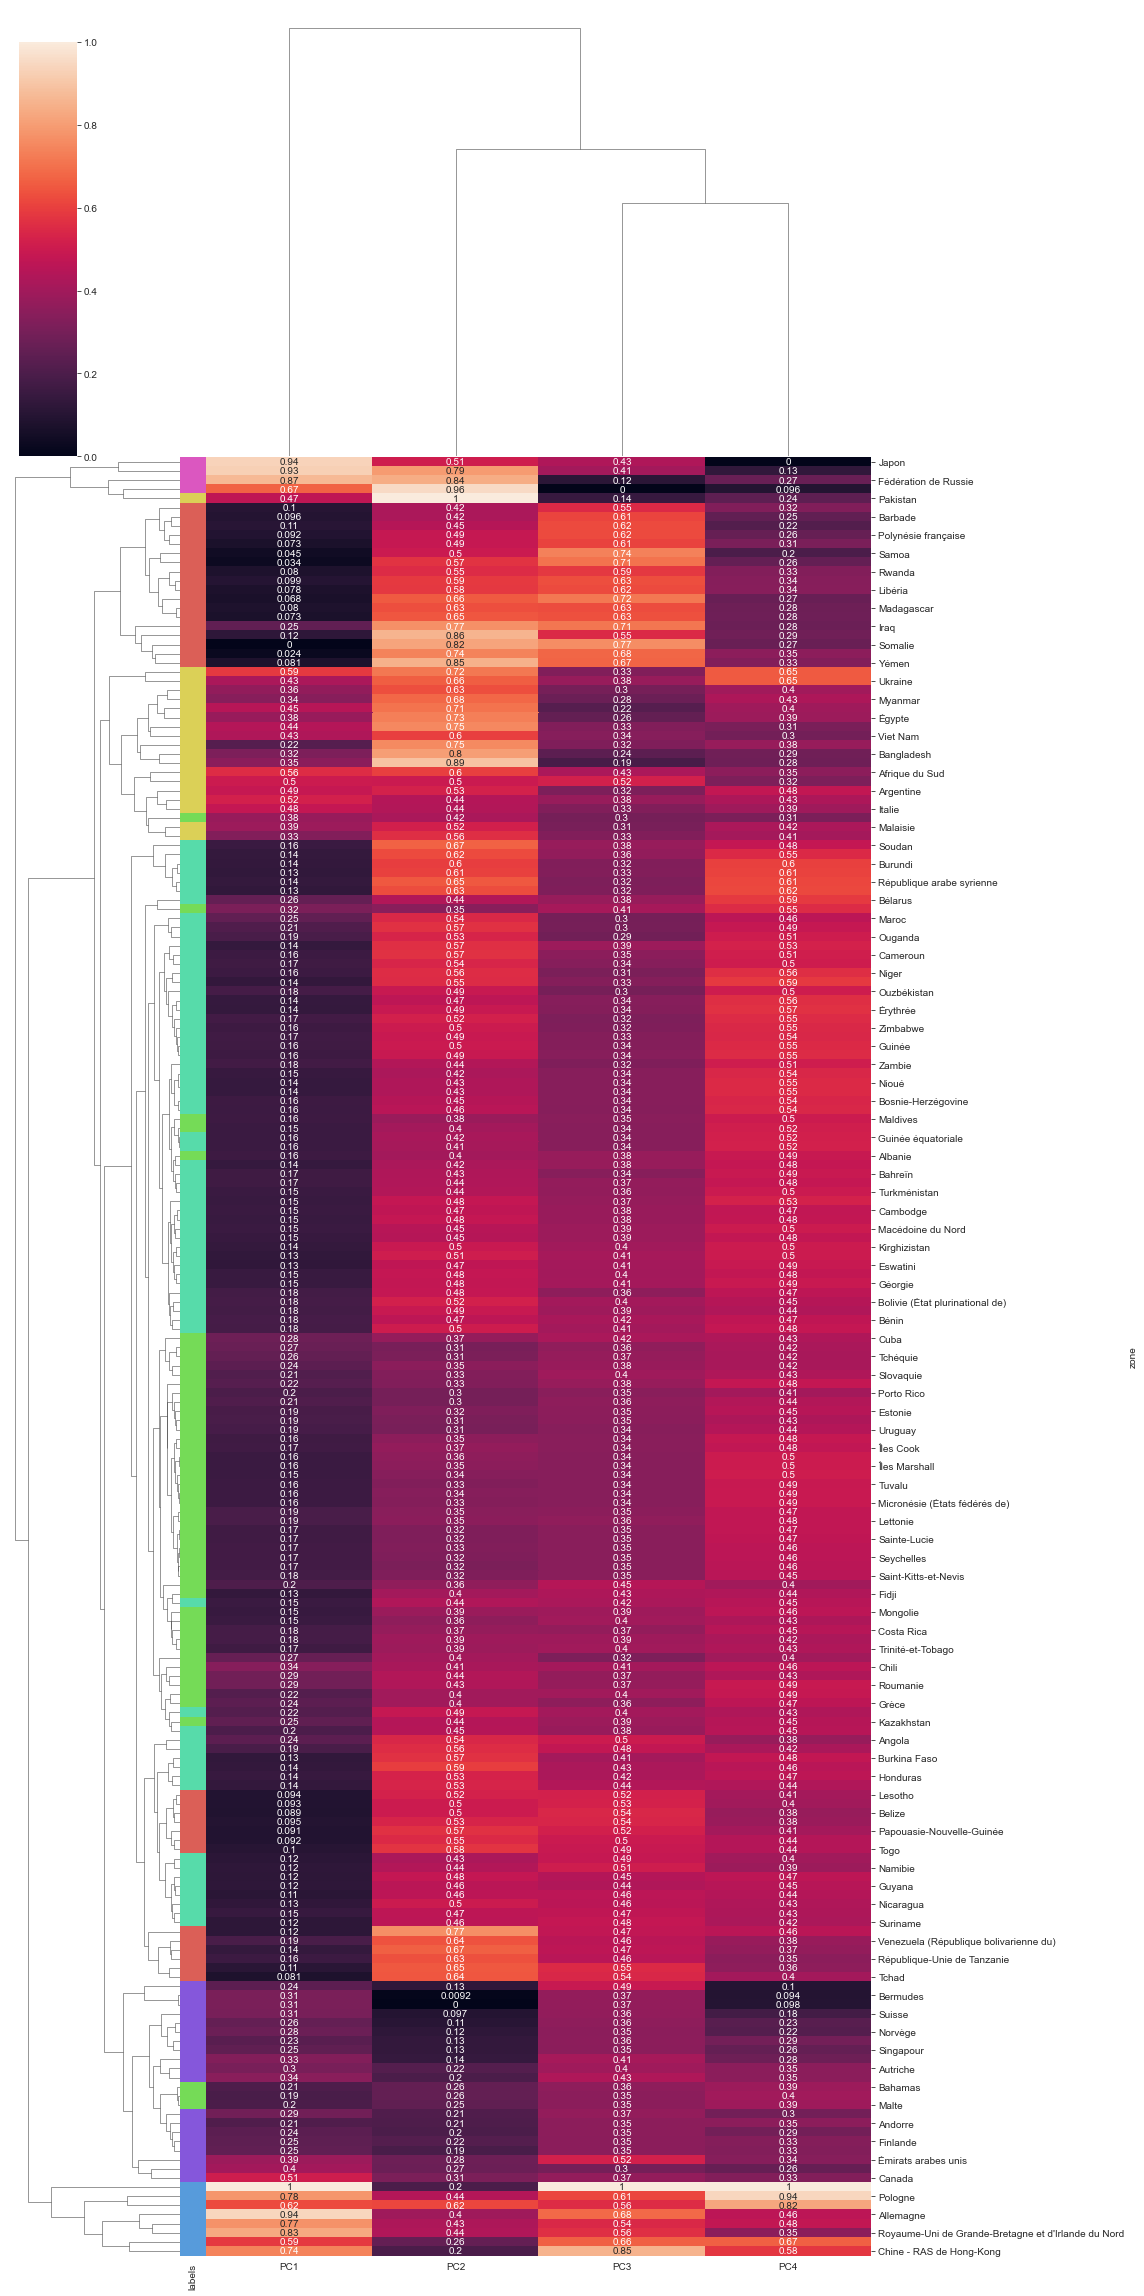

In [1876]:
sns.set_style('darkgrid')

sns.clustermap(Z4, annot=True, figsize=(16,32), standard_scale=1, row_colors=row_colors)

plt.show()

##### <font color='green'>Comme dit précédement, la clustermap permet d'interpréter simplement les clusters en fonctions des différentes composantes.</font>

#### Visualisation en 2D des différents clusters avec l'algorithme du KMeans:

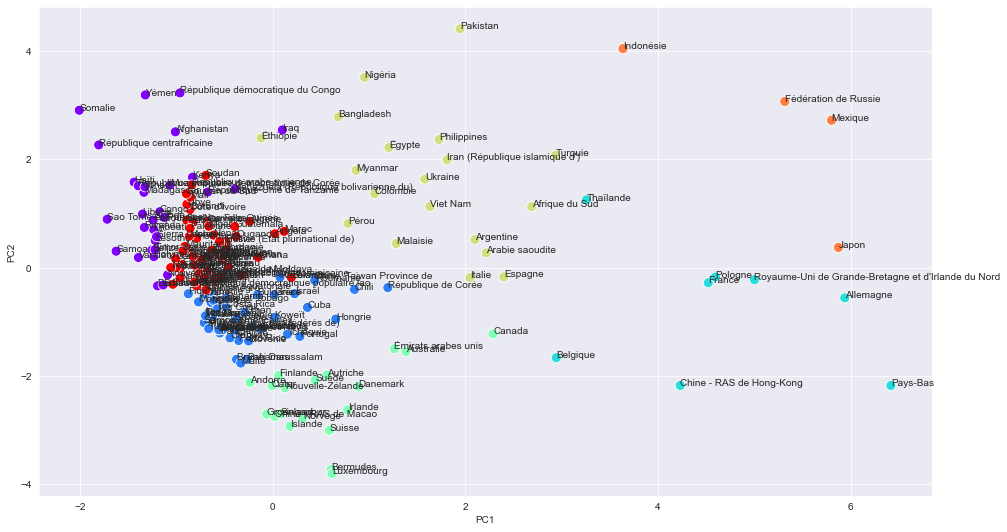

In [1877]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=Z4, x=Z4.iloc[:,0], y=Z4.iloc[:,1], hue=label2.labels, s=100, palette='rainbow', legend=False)

for i in range(Z4.shape[0]):
    plt.text(Z4.iloc[:,0][i], Z4.iloc[:,1][i], s=Z4.index[i])

plt.show()

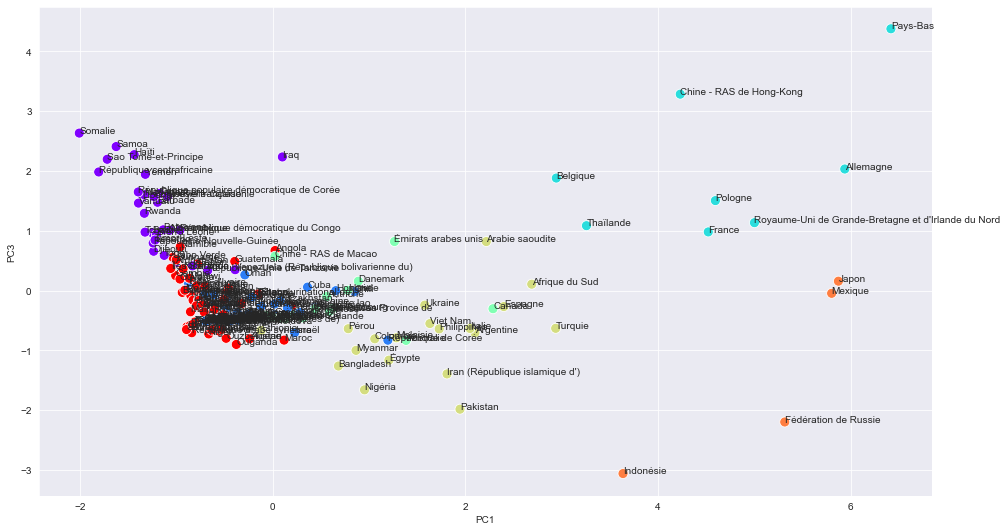

In [1878]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=Z4, x=Z4.iloc[:,0], y=Z4.iloc[:,2], hue=label2.labels, s=100, palette='rainbow', legend=False)

for i in range(Z4.shape[0]):
    plt.text(Z4.iloc[:,0][i], Z4.iloc[:,2][i], s=Z4.index[i])


plt.show()

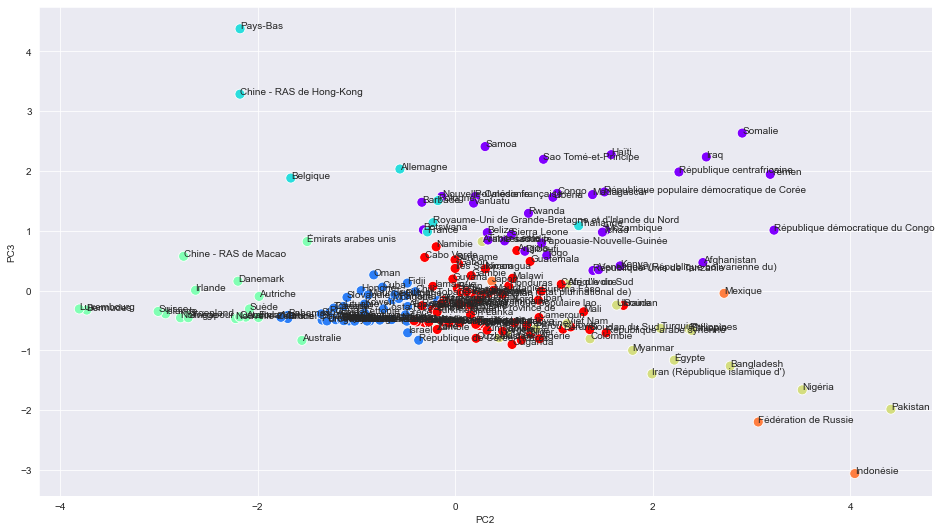

In [1879]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=Z4, x=Z4.iloc[:,1], y=Z4.iloc[:,2], hue=label2.labels, s=100, palette='rainbow', legend=False)

for i in range(Z4.shape[0]):
    plt.text(Z4.iloc[:,1][i], Z4.iloc[:,2][i], s=Z4.index[i])

plt.show()

##### <font color='green'>Ces visualisations, utilisant l'algorithme des Kmeans montrent de grandes similitudes avec celles effectuées par le CAH. Ce qui permet de renforcer la confiance dans les différents clusters.</font>

### Dataframe with clusters:

##### Dataframe labellisé à l'aide l'algorithme des Kmeans

In [1880]:
data['label'] = label2
data

<ipython-input-1880-c2a27ea8f4c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = label2


,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Afghanistan,-2.80,513.085978,0.0,29000000.0,2.800000e+07,36296113.0,22.87,0
Afrique du Sud,-0.28,6121.876572,63000000.0,514000000.0,1.667000e+09,57009756.0,5.44,4
Albanie,0.38,4514.204908,0.0,38000000.0,1.300000e+07,2884169.0,3.47,1
Algérie,-0.92,4109.701336,0.0,2000000.0,2.750000e+08,41389189.0,2.66,6
Allemagne,0.59,44552.061000,646000000.0,842000000.0,1.514000e+09,82658409.0,0.00,2
...,...,...,...,...,...,...,...,...
Érythrée,-0.73,557.874751,0.0,0.0,0.000000e+00,3412893.0,0.00,6
Éthiopie,-1.68,721.753494,0.0,1000000.0,1.400000e+07,106399924.0,14.00,4
Îles Cook,0.00,19741.188968,0.0,0.0,0.000000e+00,17507.0,0.00,1


In [1897]:
data.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,197.000000,197.000000,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197.000000,197.000000
mean,-0.072589,14305.819820,4.746193e+07,7.425381e+07,3.245431e+08,2.157810e+07,8.658528,3.147208
std,0.984193,20300.266428,1.673818e+08,1.741720e+08,6.606980e+08,3.763253e+07,12.703417,2.386966
min,-2.940000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,-0.650000,1828.194018,0.000000e+00,0.000000e+00,1.000000e+06,1.494076e+06,0.000000,1.000000
50%,0.000000,5430.875559,0.000000e+00,1.100000e+07,4.300000e+07,7.488423e+06,3.470000,3.000000
75%,0.700000,17322.172592,7.000000e+06,5.800000e+07,2.010000e+08,2.456607e+07,12.120000,6.000000
max,1.920000,113281.982125,1.418000e+09,1.069000e+09,4.444000e+09,2.646510e+08,58.950000,6.000000


##### <font color='green'>Dataframe finale permettant une première analyse des différents clusters</font>

##### Dataframe représentant le cluster n°0:

In [1881]:
data[data['label'] == 0]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Afghanistan,-2.80,513.085978,0.0,29000000.0,28000000.0,36296113.0,22.87,0
Barbade,0.97,17392.010677,0.0,2000000.0,15000000.0,286232.0,34.94,0
Belize,0.04,4887.559820,0.0,0.0,20000000.0,375769.0,26.61,0
Botswana,1.02,7893.388428,0.0,3000000.0,5000000.0,2205080.0,27.21,0
Congo,-0.53,2154.629048,0.0,104000000.0,7000000.0,5110695.0,35.22,0
Djibouti,-0.74,2930.696963,0.0,3000000.0,0.0,944099.0,21.18,0
Haïti,-0.67,775.892196,0.0,89000000.0,9000000.0,10982366.0,48.26,0
Iraq,-2.31,5076.691876,0.0,470000000.0,96000000.0,37552781.0,37.81,0
Kenya,-1.13,1572.345619,0.0,0.0,35000000.0,50221142.0,24.69,0


In [1882]:
data[data['label'] == 0].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,31.000000,31.000000,31.0,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.0
mean,-0.660645,4150.943251,0.0,3.177419e+07,4.564516e+07,1.600020e+07,34.192581,0.0
std,1.089425,7334.137828,0.0,8.567874e+07,1.104701e+08,1.971318e+07,10.151570,0.0
min,-2.940000,106.988543,0.0,0.000000e+00,0.000000e+00,1.953520e+05,20.780000,0.0
25%,-1.190000,636.967152,0.0,5.000000e+05,1.000000e+06,1.093678e+06,24.790000,0.0
50%,-0.530000,1149.151207,0.0,4.000000e+06,9.000000e+06,7.698474e+06,34.940000,0.0
75%,0.020000,3651.155548,0.0,2.050000e+07,3.750000e+07,2.670267e+07,41.205000,0.0
max,1.180000,34128.634001,0.0,4.700000e+08,6.000000e+08,8.139876e+07,58.950000,0.0


##### <font color='green'>Cluster n°0:</font>
    -instabilité politique: moyenne, 
    -pib par habitant: faible,
    -exportation: null,
    -importation: moyenne,
    -production: faible,
    -population globale: moyenne, 
    -population en sous-nutrition: élevé.

##### Dataframe représentant le cluster n°1:

In [1883]:
data[data['label'] == 1]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Albanie,0.38,4514.204908,0.0,38000000.0,13000000.0,2884169.0,3.47,1
Antigua-et-Barbuda,0.75,15383.415188,0.0,7000000.0,0.0,95426.0,0.00,1
Bahamas,0.99,32719.152336,0.0,24000000.0,6000000.0,381755.0,0.00,1
Bhoutan,1.12,3286.598606,0.0,0.0,0.0,745563.0,0.00,1
Brunéi Darussalam,1.16,28572.292244,0.0,0.0,0.0,424473.0,0.00,1
Bulgarie,0.33,8300.173316,45000000.0,108000000.0,107000000.0,7102444.0,2.82,1
Chili,0.42,14999.370089,115000000.0,155000000.0,712000000.0,18470439.0,3.25,1
Chine,0.00,8889.378410,0.0,0.0,0.0,0.0,0.00,1
"Chine, Taiwan Province de",0.86,0.000000,8000000.0,161000000.0,652000000.0,23674546.0,3.80,1


In [1884]:
data[data['label'] == 1].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,49.000000,49.000000,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,49.000000,49.0
mean,0.642245,15215.274601,1.569388e+07,4.508163e+07,1.178980e+08,5.208199e+06,1.482857,1.0
std,0.430534,9526.960541,3.636746e+07,6.572127e+07,2.092852e+08,8.851329e+06,2.841703,0.0
min,-0.890000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0
25%,0.390000,8889.378410,0.000000e+00,0.000000e+00,0.000000e+00,1.114590e+05,0.000000,1.0
50%,0.750000,15130.543438,0.000000e+00,1.400000e+07,2.300000e+07,1.951097e+06,0.000000,1.0
75%,0.970000,19741.188968,1.600000e+07,6.300000e+07,1.180000e+08,5.447900e+06,2.770000,1.0
max,1.250000,42850.548478,2.100000e+08,3.120000e+08,8.380000e+08,5.109642e+07,11.400000,1.0


##### <font color='green'>Cluster n°1:</font>
    -stabilité politique: moyenne, 
    -pib par habitant: moyenne,
    -exportation: moyenne,
    -importation: moyenne,
    -production: moyenne,
    -population globale: faible, 
    -population en sous-nutrition: faible.

##### Dataframe représentant le cluster n°2:

In [1885]:
data[data['label'] == 2]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Allemagne,0.59,44552.061000,6.460000e+08,842000000.0,1.514000e+09,82658409.0,0.0,2
Belgique,0.43,44020.066762,6.560000e+08,338000000.0,4.630000e+08,11419748.0,0.0,2
Chine - RAS de Hong-Kong,0.83,46705.027813,6.630000e+08,907000000.0,2.400000e+07,7306322.0,0.0,2
France,0.28,38720.645922,5.010000e+08,506000000.0,1.750000e+09,64842509.0,0.0,2
Pays-Bas,0.92,48989.638816,1.418000e+09,608000000.0,1.100000e+09,17021347.0,0.0,2
Pologne,0.52,13872.466907,1.025000e+09,55000000.0,2.351000e+09,37953180.0,0.0,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,0.33,39900.874075,3.590000e+08,779000000.0,1.814000e+09,66727461.0,0.0,2
Thaïlande,-0.75,6578.190858,7.960000e+08,2000000.0,1.676000e+09,69209810.0,7.8,2


In [1886]:
data[data['label'] == 2].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.0
mean,0.393750,35417.371519,7.580000e+08,5.046250e+08,1.336500e+09,4.464235e+07,0.975000,2.0
std,0.513835,16017.674231,3.307040e+08,3.472866e+08,7.668634e+08,2.988063e+07,2.757716,0.0
min,-0.750000,6578.190858,3.590000e+08,2.000000e+06,2.400000e+07,7.306322e+06,0.000000,2.0
25%,0.317500,32508.601168,6.097500e+08,2.672500e+08,9.407500e+08,1.562095e+07,0.000000,2.0
50%,0.475000,41960.470419,6.595000e+08,5.570000e+08,1.595000e+09,5.139784e+07,0.000000,2.0
75%,0.650000,45090.302703,8.532500e+08,7.947500e+08,1.766000e+09,6.734805e+07,0.000000,2.0
max,0.920000,48989.638816,1.418000e+09,9.070000e+08,2.351000e+09,8.265841e+07,7.800000,2.0


##### <font color='green'>Cluster n°2:</font>
    -stabilité politique: moyenne, 
    -pib par habitant: fort,
    -exportation: forte,
    -importation: forte,
    -production: forte,
    -population globale: moyenne, 
    -population en sous-nutrition: faible.

##### Dataframe représentant le cluster n°3:

In [1887]:
data[data['label'] == 3]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Andorre,1.42,38962.613799,0.0,0.0,0.000000e+00,77001.0,0.00,3
Australie,0.89,57628.863849,42000000.0,16000000.0,1.269000e+09,24584620.0,0.00,3
Autriche,1.05,47306.411842,78000000.0,110000000.0,1.480000e+08,8819901.0,0.00,3
Bermudes,1.00,113281.982125,0.0,0.0,0.000000e+00,63049.0,0.00,3
Canada,1.10,44906.748920,163000000.0,182000000.0,1.417000e+09,36732095.0,0.00,3
Chine - RAS de Macao,1.43,81516.664768,0.0,23000000.0,3.000000e+06,622585.0,16.06,3
Danemark,0.87,57938.797728,139000000.0,133000000.0,1.730000e+08,5732274.0,0.00,3
Finlande,1.08,46310.120883,12000000.0,16000000.0,1.290000e+08,5511371.0,0.00,3
Groenland,1.92,50046.116800,0.0,0.0,0.000000e+00,56481.0,0.00,3


In [1888]:
data[data['label'] == 3].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,19.000000,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.0
mean,1.175789,63662.861205,3.536842e+07,6.121053e+07,2.041579e+08,7.060947e+06,1.011579,3.0
std,0.332437,21437.035820,5.200129e+07,1.053679e+08,4.083958e+08,9.191270e+06,3.715333,0.0
min,0.620000,38962.613799,0.000000e+00,0.000000e+00,0.000000e+00,5.648100e+04,0.000000,3.0
25%,0.990000,46808.266362,0.000000e+00,5.000000e+05,0.000000e+00,6.072475e+05,0.000000,3.0
50%,1.100000,57938.797728,4.000000e+06,1.600000e+07,9.100000e+07,5.296326e+06,0.000000,3.0
75%,1.385000,74226.270203,6.000000e+07,9.150000e+07,1.525000e+08,8.637852e+06,0.000000,3.0
max,1.920000,113281.982125,1.630000e+08,4.330000e+08,1.417000e+09,3.673210e+07,16.060000,3.0


##### <font color='green'>Cluster n°3:</font>
    -stabilité politique: fort, 
    -pib par habitant: fort,
    -exportation: moyenne,
    -importation: moyenne,
    -production: moyenne,
    -population globale: faible, 
    -population en sous-nutrition: faible.

##### Dataframe représentant le cluster n°4:

In [1889]:
data[data['label'] == 4]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Afrique du Sud,-0.28,6121.876572,63000000.0,514000000.0,1.667000e+09,57009756.0,5.44,4
Arabie saoudite,-0.58,20802.465306,10000000.0,722000000.0,6.160000e+08,33101179.0,3.63,4
Argentine,0.17,14627.615635,207000000.0,8000000.0,2.161000e+09,43937140.0,3.19,4
Bangladesh,-1.26,1538.233627,0.0,0.0,2.490000e+08,159685424.0,12.52,4
Colombie,-0.77,6376.707362,2000000.0,78000000.0,1.564000e+09,48909839.0,7.16,4
Espagne,0.28,28137.441564,212000000.0,205000000.0,1.515000e+09,46647428.0,0.00,4
Iran (République islamique d'),-0.93,5714.068676,45000000.0,6000000.0,2.174000e+09,80673883.0,5.21,4
Italie,0.31,32333.550863,183000000.0,97000000.0,1.315000e+09,60673701.0,0.00,4
Malaisie,0.12,10259.211512,44000000.0,68000000.0,1.724000e+09,31104646.0,3.54,4


In [1890]:
data[data['label'] == 4].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,19.000000,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.0
mean,-0.860000,8343.437925,7.773684e+07,1.335789e+08,1.279947e+09,8.281945e+07,6.076842,4.0
std,0.871907,9338.984032,1.231737e+08,1.951843e+08,6.456809e+08,5.263426e+07,4.467184,0.0
min,-2.410000,721.753494,0.000000e+00,0.000000e+00,1.400000e+07,3.110465e+07,0.000000,4.0
25%,-1.550000,1996.009198,1.000000e+06,3.000000e+06,1.018000e+09,4.556757e+07,3.365000,4.0
50%,-0.930000,5714.068676,4.000000e+06,6.800000e+07,1.315000e+09,6.067370e+07,5.440000,4.0
75%,-0.070000,10424.392316,1.230000e+08,1.630000e+08,1.664500e+09,1.008078e+08,9.060000,4.0
max,0.310000,32333.550863,4.290000e+08,7.220000e+08,2.192000e+09,2.079062e+08,14.000000,4.0


##### <font color='green'>Cluster n°4:</font>
    -instabilité politique: moyenne, 
    -pib par habitant: faible,
    -exportation: moyenne,
    -importation: forte,
    -production: forte,
    -population globale: moyenne, 
    -population en sous-nutrition: moyenne.

##### Dataframe représentant le cluster n°5:

In [1891]:
data[data['label'] == 5]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Fédération de Russie,-0.64,10840.230674,115000000.0,2.260000e+08,4.444000e+09,145530082.0,0.00,5
Indonésie,-0.50,3837.578117,0.0,1.000000e+06,2.301000e+09,264650963.0,6.35,5
Japon,1.11,38170.669761,10000000.0,1.069000e+09,2.215000e+09,127502725.0,0.00,5
Mexique,-0.72,9278.409912,9000000.0,9.720000e+08,3.249000e+09,124777324.0,6.17,5


In [1892]:
data[data['label'] == 5].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.00000,4.0
mean,-0.187500,15531.722116,3.350000e+07,5.670000e+08,3.052250e+09,1.656153e+08,3.13000,5.0
std,0.869765,15388.187676,5.451911e+07,5.331248e+08,1.039398e+09,6.666280e+07,3.61496,0.0
min,-0.720000,3837.578117,0.000000e+00,1.000000e+06,2.215000e+09,1.247773e+08,0.00000,5.0
25%,-0.660000,7918.201963,6.750000e+06,1.697500e+08,2.279500e+09,1.268214e+08,0.00000,5.0
50%,-0.570000,10059.320293,9.500000e+06,5.990000e+08,2.775000e+09,1.365164e+08,3.08500,5.0
75%,-0.097500,17672.840446,3.625000e+07,9.962500e+08,3.547750e+09,1.753103e+08,6.21500,5.0
max,1.110000,38170.669761,1.150000e+08,1.069000e+09,4.444000e+09,2.646510e+08,6.35000,5.0


##### <font color='green'>Cluster n°5:</font>
    -instabilité politique: faible, 
    -pib par habitant: moyen,
    -exportation: moyenne,
    -importation: forte,
    -production: forte,
    -population globale: moyenne, 
    -population en sous-nutrition: faible.

##### Dataframe représentant le cluster n°6:

In [1893]:
data[data['label'] == 6]

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
zone,,,,,,,,
Algérie,-0.92,4109.701336,0.0,2000000.0,275000000.0,41389189.0,2.66,6
Angola,-0.33,4095.811686,0.0,277000000.0,42000000.0,29816766.0,15.43,6
Arménie,-0.62,3914.525246,0.0,35000000.0,11000000.0,2944791.0,3.40,6
Azerbaïdjan,-0.75,4150.868844,0.0,27000000.0,104000000.0,9845320.0,0.00,6
Bahreïn,-0.96,23742.953234,0.0,0.0,0.0,1494076.0,0.00,6
...,...,...,...,...,...,...,...,...
Zambie,0.15,1534.874627,1000000.0,12000000.0,49000000.0,16853599.0,0.00,6
Zimbabwe,-0.71,1548.186368,0.0,6000000.0,69000000.0,14236595.0,0.00,6
Équateur,-0.07,6213.501276,0.0,0.0,340000000.0,16785361.0,10.72,6


In [1894]:
data[data['label'] == 6].describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté,label
count,67.000000,67.000000,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,67.000000,67.0
mean,-0.502836,3439.302452,3.492537e+06,2.131343e+07,8.423881e+07,1.152763e+07,6.240299,6.0
std,0.720002,3418.648342,1.860301e+07,4.391804e+07,1.392897e+08,1.088471e+07,6.144498,0.0
min,-2.620000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+03,0.000000,6.0
25%,-0.720000,1190.531791,0.000000e+00,0.000000e+00,2.000000e+06,2.932820e+06,0.000000,6.0
50%,-0.320000,2990.994843,0.000000e+00,6.000000e+06,3.100000e+07,8.880268e+06,5.750000,6.0
75%,-0.045000,4651.871284,1.000000e+06,2.250000e+07,8.300000e+07,1.688428e+07,10.495000,6.0
max,0.770000,23742.953234,1.520000e+08,2.770000e+08,7.620000e+08,4.138919e+07,20.810000,6.0


##### <font color='green'>Cluster n°6:</font>
    -instabilité politique: moyenne, 
    -pib par habitant: faible,
    -exportation: faible,
    -importation: moyenne,
    -production: faible,
    -population globale: moyenne, 
    -population en sous-nutrition: moyenne.

##### Dataframe représentant le cluster n°7:

In [1895]:
cluster7

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
zone,,,,,,,
"Chine, continentale",0.00,8663.125742,5.760000e+08,452000000.0,1.823600e+10,1.421022e+09,0.00
Inde,-0.76,1961.338029,4.000000e+06,0.0,3.545000e+09,1.338677e+09,13.81
États-Unis d'Amérique,0.34,60116.568493,3.692000e+09,123000000.0,2.191400e+10,3.250848e+08,0.00
Brésil,-0.42,9925.419442,4.223000e+09,3000000.0,1.420100e+10,2.078338e+08,0.00


In [1896]:
cluster7.describe()

,stabilité politique,pib par habitant,Exportation,Importation,Production,population,population sous alimenté
count,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.0000
mean,-0.210000,20166.612926,2.123750e+09,1.445000e+08,1.447400e+10,8.231543e+08,3.4525
std,0.480694,26861.640836,2.141271e+09,2.128544e+08,7.937754e+09,6.454718e+08,6.9050
min,-0.760000,1961.338029,4.000000e+06,0.000000e+00,3.545000e+09,2.078338e+08,0.0000
25%,-0.505000,6987.678814,4.330000e+08,2.250000e+06,1.153700e+10,2.957720e+08,0.0000
50%,-0.210000,9294.272592,2.134000e+09,6.300000e+07,1.621850e+10,8.318808e+08,0.0000
75%,0.085000,22473.206705,3.824750e+09,2.052500e+08,1.915550e+10,1.359263e+09,3.4525
max,0.340000,60116.568493,4.223000e+09,4.520000e+08,2.191400e+10,1.421022e+09,13.8100


##### <font color='green'>Dans ce cluster n°7, on va avoir les pays n'ayant pas pu être labelisé. Ce sont tous des pays avec une production et une population élevées. Un pib par habitant faible, mis à part les US. Mais aussi avec un stabilité politique moyenne de -0,21.</font>

### Conclusion:

#### <font color='green'>Cette première analyse, indique que le cluster n°1 est plus interessant de part sa stabilité politique moyenne, ce qui permet d'assurer la sécurité des employés et des fonds investis. De plus, il a un PIB par habitant moyen ce qui évite d'avoir une charge salariale trop importante lors de l'implantation. Pour terminé, grâce a sa production moyenne il  permet d'éviter une concurrence trop rude qui pourrait rendre difficile l'implantation. Il faudra continuer d'affiner nos analyses pour choisir le bon candidat.
</font>